In [69]:
import numpy as np
import pandas as pd
from statistics import mean 

import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import IsolationForest

In [169]:
df=pd.read_csv("data/card_transactions.csv")
df.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  
0          0.428571  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000

In [14]:
print(df.shape,len(df["customer_id"].unique()),df.dtypes,df.isna().sum())

(8500, 18) 8500 customer_id                          object
balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                      int64
nr_purchases                          int64
credit_limit                        float64
fixed_rate_period                     int64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
dtype: object customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases    

Just some overall stats: 8500 customers, with 18 features each, indeed no duplicates, aka unique customer_id length is the same than the overall dataframe dimensions, min payment has quite a couple of NAs, so let's deal with that via imputing data maybe later on.

In [9]:
#sns.heatmap(df.drop(columns=["customer_id"]).corr(),anotate=True)
df.drop(columns=["customer_id"]).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

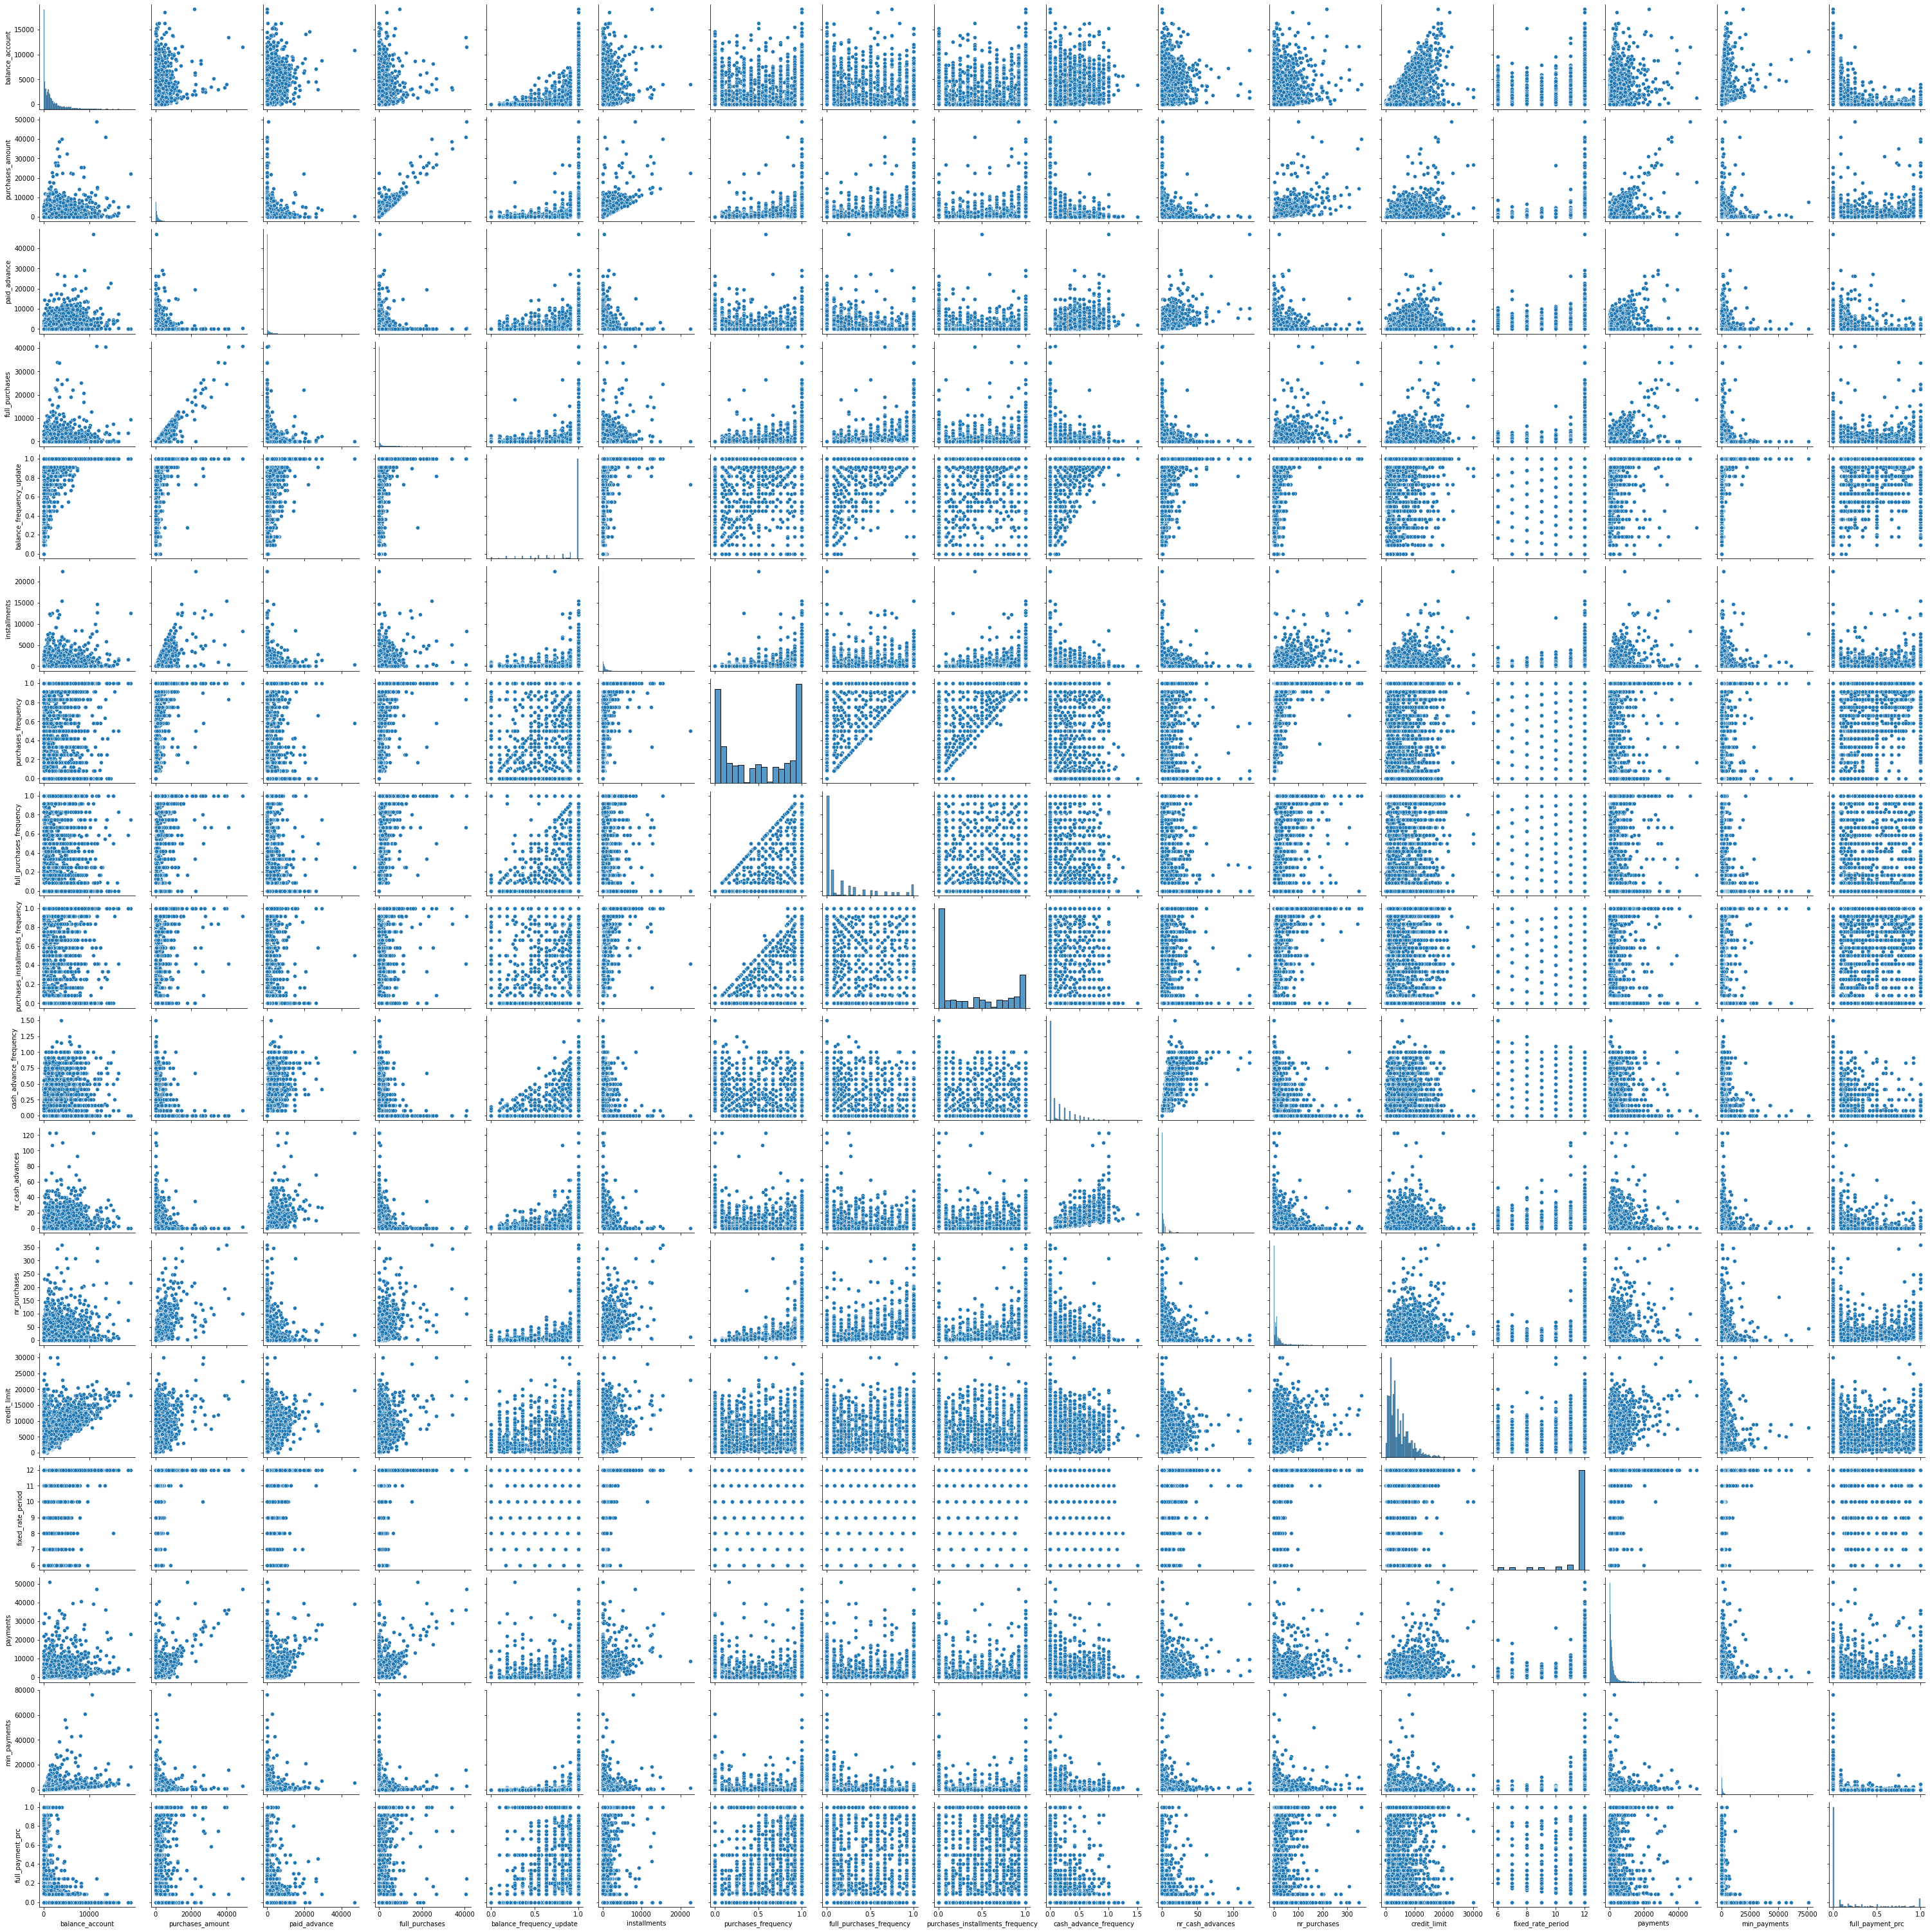

In [12]:
#sns.pairplot(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

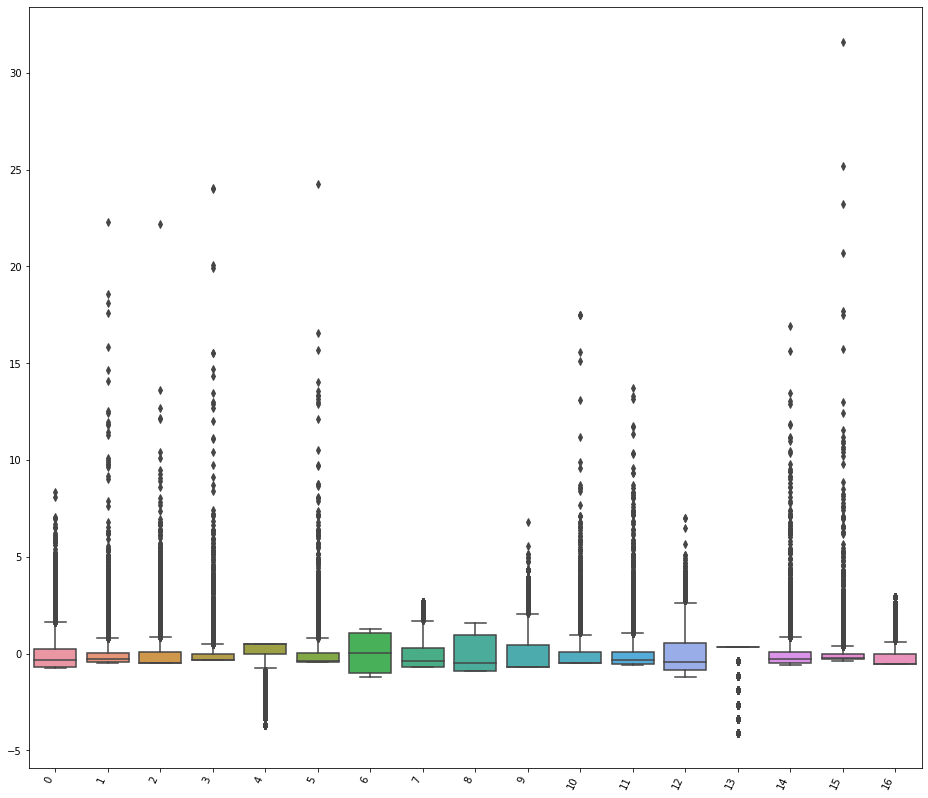

In [15]:
sc = StandardScaler()
df_scaled= pd.DataFrame(sc.fit_transform(df.drop(columns=["customer_id"])))
#columns = df.drop(columns=["customer_id"]).columns)
plt.figure(figsize=(16,14))
sns.boxplot(data = df_scaled)
plt.xticks(rotation=65, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'balance_account'),
  Text(1, 0, 'purchases_amount'),
  Text(2, 0, 'paid_advance'),
  Text(3, 0, 'full_purchases'),
  Text(4, 0, 'balance_frequency_update'),
  Text(5, 0, 'installments'),
  Text(6, 0, 'purchases_frequency'),
  Text(7, 0, 'full_purchases_frequency'),
  Text(8, 0, 'purchases_installments_frequency'),
  Text(9, 0, 'cash_advance_frequency'),
  Text(10, 0, 'nr_cash_advances'),
  Text(11, 0, 'nr_purchases'),
  Text(12, 0, 'credit_limit'),
  Text(13, 0, 'fixed_rate_period'),
  Text(14, 0, 'payments'),
  Text(15, 0, 'min_payments'),
  Text(16, 0, 'full_payment_prc')])

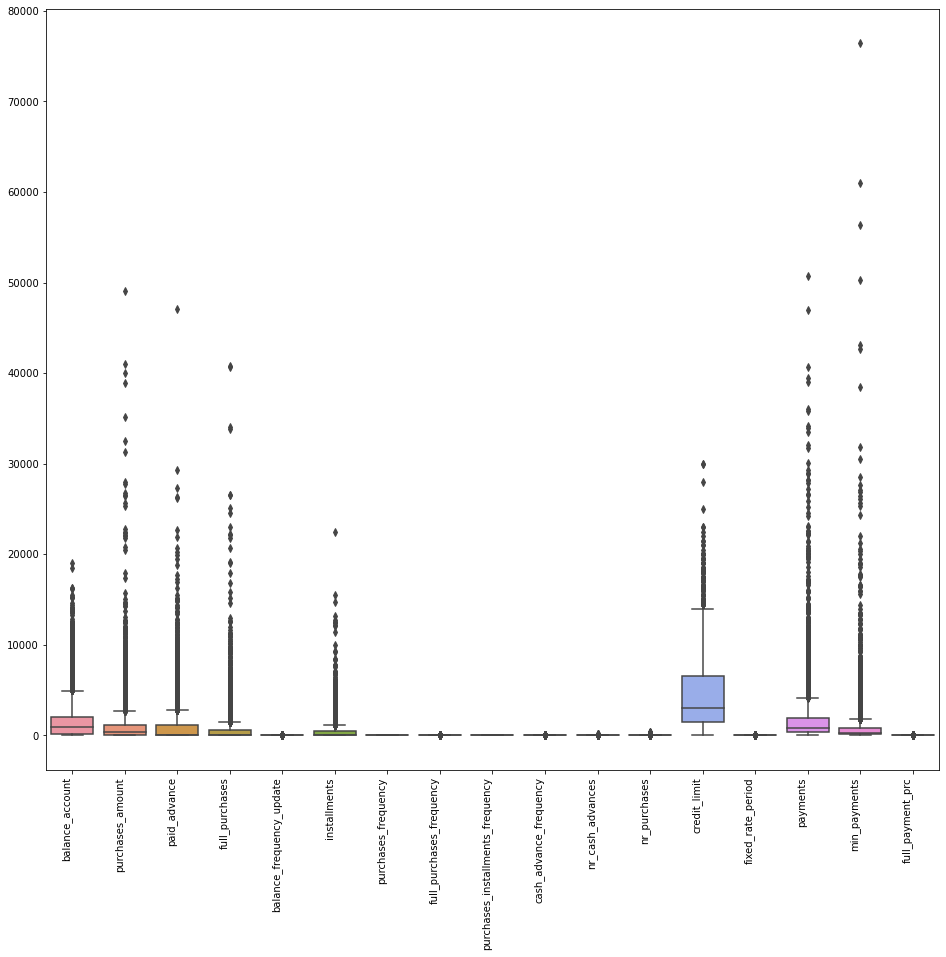

In [16]:
plt.figure(figsize=(16,14))
sns.boxplot(data=df.drop(columns=["customer_id"]))
plt.xticks(rotation=90, horizontalalignment='right')

In [ ]:
plt.figure(figsize=(16,14))
sns.boxplot(data=df.drop(columns=["customer_id"]))
plt.xticks(rotation=90, horizontalalignment='right')

In [17]:
df_min=df.drop(columns=["customer_id"]).dropna(axis='rows')
df_min.shape

(8201, 17)

In [18]:
from sklearn.decomposition import PCA

In [114]:
pca_95 = PCA(n_components=0.99999,random_state=17)


pip_pca_95=Pipeline(steps=[('sc', sc), ('pca', pca_95)])


X_pca_min_95 = pip_pca_95.fit_transform(df_min)
print(pca_95.explained_variance_ratio_)
print(len(X_pca_min_95),len(pca_95.explained_variance_ratio_))

[0.27219475 0.20387202 0.08935878 0.07586159 0.0624246  0.0568539
 0.04906313 0.04237858 0.03697792 0.03085407 0.02348331 0.01782261
 0.01427164 0.01174473 0.01011531 0.00272233]
8201 16


Using linear PCA to find out how many principal components we need to keep 95% of the total Variance: seems 12 principle components is what it needs, the first two components contribute about 47 %. Clearly with 18 features at hand dimensionality is not an issue.

Text(0, 0.5, 'sum of explained variances')

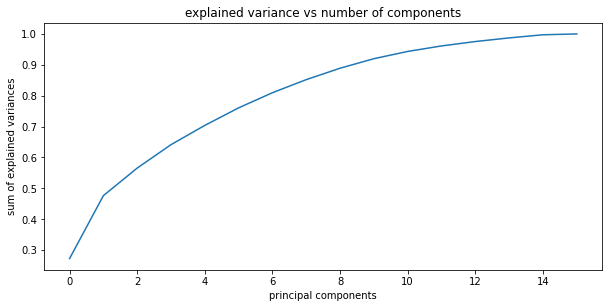

In [115]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.plot(np.cumsum(pca_95.explained_variance_ratio_))
plt.title("explained variance vs number of components")
plt.xlabel("principal components")
plt.ylabel("sum of explained variances")

In [117]:
ind80=np.argwhere(np.cumsum(pca_95.explained_variance_ratio_) >= 0.80)[0]
print(ind80)

[6]


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_errors = []
silhouette_s = []
#pip_kmeans_pca_95=Pipeline(steps=[('sc', sc), ('pca', pca_95)])

for n_clusters in range(2, 20):
    kmeans_pipeline = Pipeline(steps=[('sc', sc),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=17, verbose=0))])
    kmeans_pipeline.fit(df_min)
    kmeans_pipeline.predict(df_min)
    cluster_labels = kmeans_pipeline.fit_predict(df_min)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_min, cluster_labels))
    silhouette_s.append(silhouette_score(df_min, cluster_labels))

For n_clusters = 2 The average silhouette_score is : 0.0704116417249244
For n_clusters = 3 The average silhouette_score is : 0.3369471179318635
For n_clusters = 4 The average silhouette_score is : 0.05411571162911176
For n_clusters = 5 The average silhouette_score is : 0.0017870589480970126
For n_clusters = 6 The average silhouette_score is : 0.005660329372925878
For n_clusters = 7 The average silhouette_score is : -0.05557730987505708
For n_clusters = 8 The average silhouette_score is : -0.05583756961312066
For n_clusters = 9 The average silhouette_score is : -0.03431406172289391
For n_clusters = 10 The average silhouette_score is : -0.03919216711099091
For n_clusters = 11 The average silhouette_score is : -0.04957750662961563
For n_clusters = 12 The average silhouette_score is : -0.04770107033869808
For n_clusters = 13 The average silhouette_score is : -0.05784246722985707
For n_clusters = 14 The average silhouette_score is : -0.060267929640539175
For n_clusters = 15 The average silh

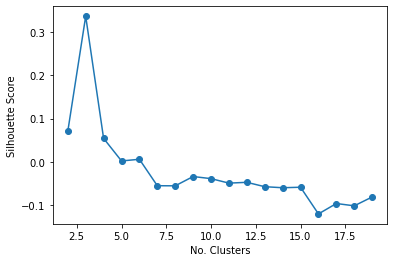

In [24]:
plt.plot(range(2, 20),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

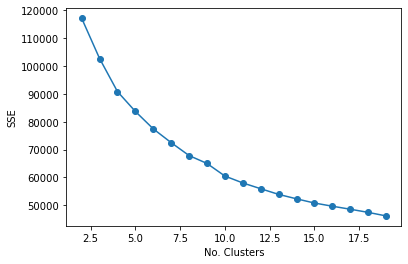

In [25]:
plt.plot(range(2, 20),cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
import umap

reducer = umap.UMAP(n_components=2,
     n_neighbors=10,verbose=1)
X_umap = reducer.fit_transform(df_min)

UMAP(n_neighbors=10, verbose=1)
Construct fuzzy simplicial set
Fri Oct  9 09:29:58 2020 Finding Nearest Neighbors
Fri Oct  9 09:29:58 2020 Building RP forest with 10 trees
Fri Oct  9 09:29:59 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
Fri Oct  9 09:30:05 2020 Finished Nearest Neighbor Search
Fri Oct  9 09:30:07 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Oct  9 09:30:13 2020 Finished embedding


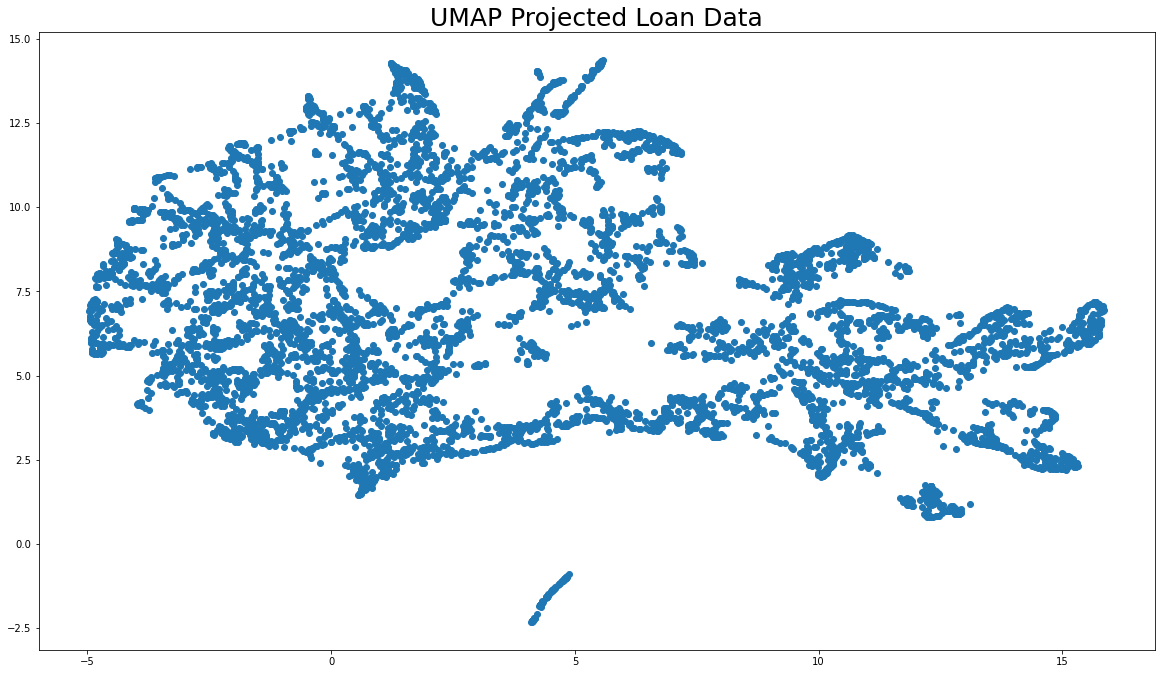

In [27]:
fig = plt.figure(figsize=(20,25))

# plot projected roll
ax = fig.add_subplot(212)
ax.scatter(X_umap[:, 0], X_umap[:, 1])
plt.axis('tight')
#plt.xticks([]), plt.yticks([])
plt.title('UMAP Projected Loan Data',fontsize=25)
plt.show()

In [28]:
cluster_errors_umap = []
silhouette_s_umap = []
#pip_kmeans_pca_95=Pipeline(steps=[('sc', sc), ('pca', pca_95)])

for n_clusters in range(2, 20):
    kmeans_umap=KMeans(n_clusters=n_clusters, random_state=17, verbose=0)
    kmeans_umap.fit(df_min)
    kmeans_umap.predict(df_min)
    cluster_labels_umap = kmeans_umap.fit_predict(df_min)
    cluster_errors_umap.append(kmeans_umap.inertia_)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_min, cluster_labels_umap))
    silhouette_s_umap.append(silhouette_score(df_min, cluster_labels_umap))

For n_clusters = 2 The average silhouette_score is : 0.5126102011827779
For n_clusters = 3 The average silhouette_score is : 0.46837202322774873
For n_clusters = 4 The average silhouette_score is : 0.3888387440747015
For n_clusters = 5 The average silhouette_score is : 0.3875521089242529
For n_clusters = 6 The average silhouette_score is : 0.37130476438014987
For n_clusters = 7 The average silhouette_score is : 0.36967508783809755
For n_clusters = 8 The average silhouette_score is : 0.3836804904798149
For n_clusters = 9 The average silhouette_score is : 0.34994396820843066
For n_clusters = 10 The average silhouette_score is : 0.35699319124475404
For n_clusters = 11 The average silhouette_score is : 0.3620276545280617
For n_clusters = 12 The average silhouette_score is : 0.3615775977694081
For n_clusters = 13 The average silhouette_score is : 0.266634239470865
For n_clusters = 14 The average silhouette_score is : 0.2975885755237283
For n_clusters = 15 The average silhouette_score is : 0

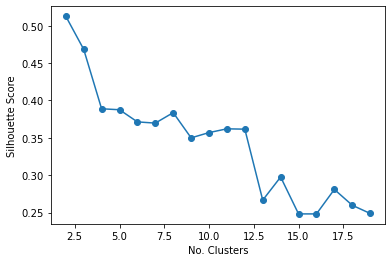

In [39]:
plt.plot(range(2, 20),silhouette_s_umap, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

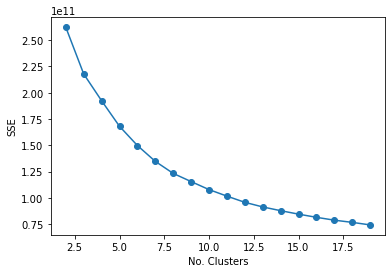

In [29]:
plt.plot(range(2, 20),cluster_errors_umap, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
from sklearn.impute import KNNImputer

In [182]:
### Numerical columns
num_feat = df.iloc[:, list(np.where(df.dtypes != "object")[0])]
num_col_name = df.iloc[:, list(np.where(df.dtypes != "object")[0])].columns

sc = StandardScaler()
### KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
imputed = imputer.fit_transform(num_feat)

### Recreate Dataframe
pip_sc_knn=Pipeline(steps=[('sc', sc), ('knn', imputer )])
imputed_sc = pip_sc_knn.fit_transform(num_feat)


df_no_na_sc = pd.DataFrame(imputed_sc, columns=num_col_name)
df_result_sc = pd.concat([pd.DataFrame(df.iloc[:,0]), df_no_na_sc], axis=1, sort=False)
print(df_result_sc.head())


df_no_na = pd.DataFrame(imputed, columns=num_col_name)
df_result = pd.concat([pd.DataFrame(df.iloc[:,0]), df_no_na], axis=1, sort=False)
print(df_result.head())

df_result.isna().sum().sum()
df_result.head()
print(df_result.shape,df_result_sc.shape)



        customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS        -0.744666         -0.414083     -0.468389   
1  stEDu20sSKOXomjg        -0.723920         -0.394260     -0.468389   
2  CEB2blrN3b88GsRe        -0.098138         -0.464035     -0.245690   
3  0N0eBl8ySaZThxKE         0.217997         -0.295433     -0.468389   
4  6NLauoHUwtwOv4Wy        -0.738436         -0.419933      0.090712   

   full_purchases  balance_frequency_update  installments  \
0       -0.352328                  0.138183     -0.334153   
1       -0.352328                  0.520953     -0.287234   
2       -0.352328                  0.520953     -0.452383   
3       -0.134773                  0.520953     -0.452383   
4       -0.295420                 -2.158437     -0.452383   

   purchases_frequency  full_purchases_frequency  \
0             1.046519                 -0.678245   
1             1.273196                 -0.678245   
2            -1.220250                 -0.67

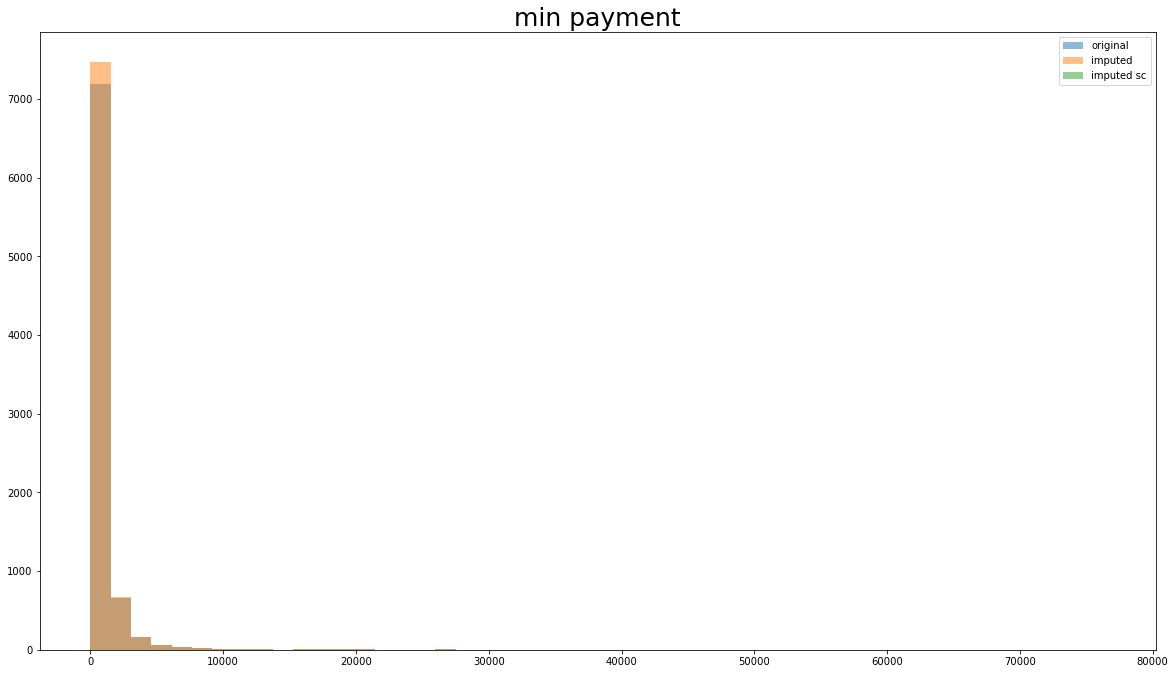

In [180]:
fig = plt.figure(figsize=(20,25))

# plot projected roll
ax = fig.add_subplot(212)
ax.hist(x=df["min_payments"],bins=50,alpha=0.5,label="original")
ax.hist(x=df_result["min_payments"],bins=50,alpha=0.5,label="imputed")
ax.hist(x=df_result_sc["min_payments"],bins=50,alpha=0.5,label="imputed sc")
plt.axis('tight')
plt.legend()
#plt.xticks([]), plt.yticks([])
plt.title('min payment',fontsize=25)
plt.show()

/opt/anaconda3/envs/propulsion/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


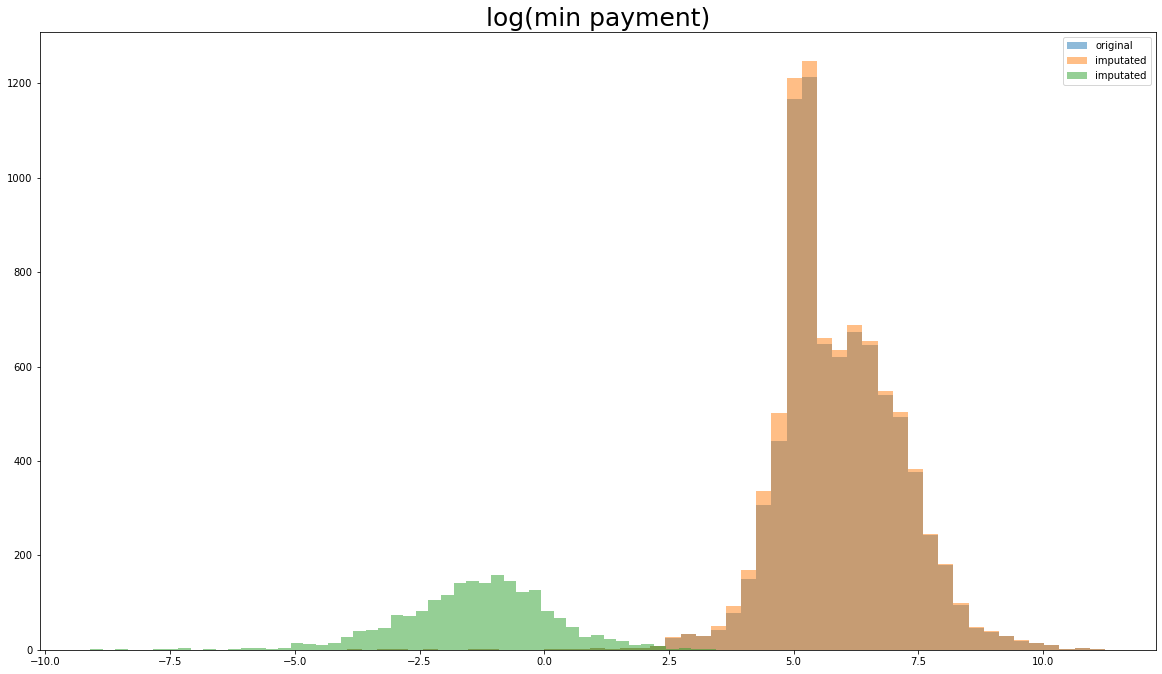

In [181]:
fig = plt.figure(figsize=(20,25))

# plot projected roll
ax = fig.add_subplot(212)
ax.hist(x=np.log(df["min_payments"]),bins=50,alpha=0.5,label="original")
ax.hist(x=np.log(df_result["min_payments"]),bins=50,alpha=0.5,label="imputated")
ax.hist(x=np.log(df_result_sc["min_payments"]),bins=50,alpha=0.5,label="imputated")
plt.axis('tight')
plt.legend()
#plt.xticks([]), plt.yticks([])
plt.title('log(min payment)',fontsize=25)
plt.show()

In [60]:
### KNN Imputer
print(num_feat.isna().sum())
imputer_10 = KNNImputer(n_neighbors=10, weights="distance")
imputed_10 = imputer_10.fit_transform(num_feat)

df_no_na_10 = pd.DataFrame(imputed_10, columns=num_col_name)
df_result_10 = pd.concat([pd.DataFrame(df.iloc[:,0]), df_no_na_10], axis=1, sort=False)

balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64


In [66]:
### KNN Imputer
print(num_feat.isna().sum())
imputer_15 = KNNImputer(n_neighbors=15, weights="distance")
imputed_15 = imputer_15.fit_transform(num_feat)

df_no_na_15 = pd.DataFrame(imputed_15, columns=num_col_name)
df_result_15 = pd.concat([pd.DataFrame(df.iloc[:,0]), df_no_na_15], axis=1, sort=False)### KNN Imputer
print(num_feat.isna().sum())

balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency   

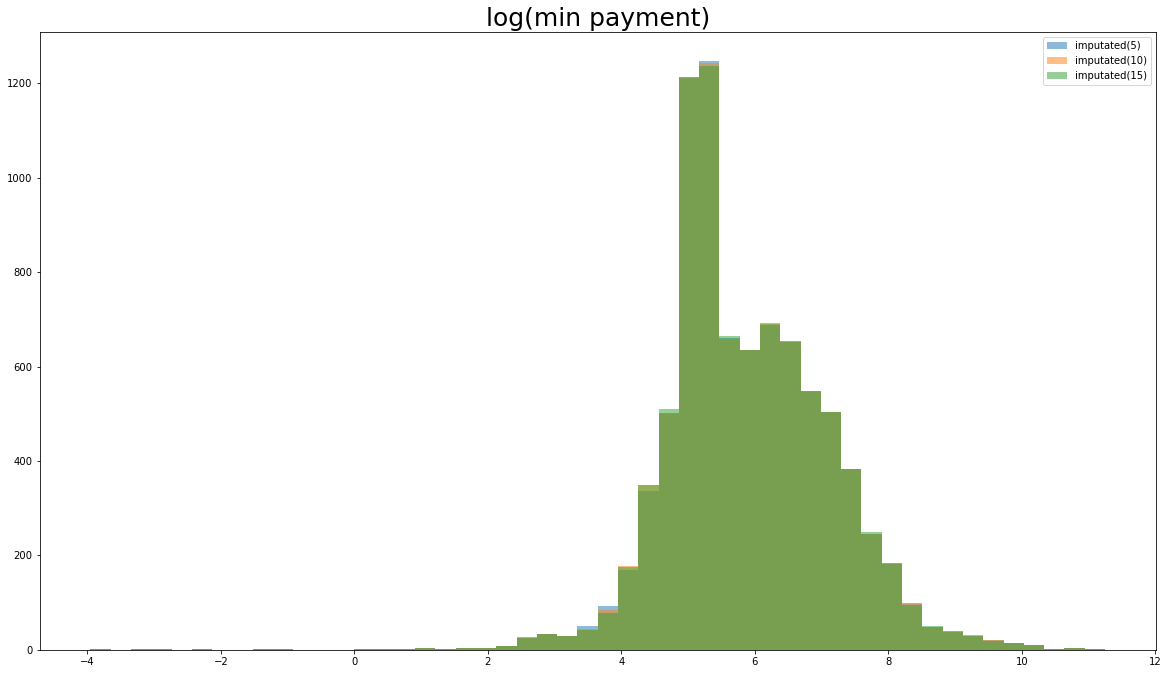

850.6760868500562 851.8434138747776 854.1593781665052 865.5946827670081


In [67]:
fig = plt.figure(figsize=(20,25))

# plot projected roll
ax = fig.add_subplot(212)
#x.hist(x=np.log(df["min_payments"]),bins=50,alpha=0.5,label="original")
ax.hist(x=np.log(df_result["min_payments"]),bins=50,alpha=0.5,label="imputated(5)")
ax.hist(x=np.log(df_result_10["min_payments"]),bins=50,alpha=0.5,label="imputated(10)")
ax.hist(x=np.log(df_result_15["min_payments"]),bins=50,alpha=0.5,label="imputated(15)")
plt.axis('tight')
plt.legend()
#plt.xticks([]), plt.yticks([])
plt.title('log(min payment)',fontsize=25)
plt.show()
print(mean(df_result_15["min_payments"]),mean(df_result_10["min_payments"]),mean(df_result["min_payments"]),mean(df["min_payments"].dropna()))

Tried 3 different number of neighbours (5,10,15) for imputation of Na's in minimum payments: all observed distributions are very similar, the overall mean compared to the original distribution is lower (about 15 $). Most imputated values end up being on the low side, which is the most populated area. Nothing much is added on the high end tail. Choose as default 10 for imputation.

In [119]:
df_final=df_result_10
df_final.to_csv("data/card_transactions_NA_Replaced.csv")

In [122]:
df_final=df_final.drop(columns=["customer_id"])
df_final.shape
df_final.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

In [98]:
n_samples = 300
outliers_fraction = 0.01
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared

isof_10=IsolationForest(contamination=outliers_fraction,random_state=17)
isof_y_10=isof_10.fit_predict(df_final)
#print(outlier_index)

In [124]:
reducer = umap.UMAP(n_components=3,
     n_neighbors=20,verbose=1)
X_reduce = reducer.fit_transform(df_final)

UMAP(n_components=3, n_neighbors=20, verbose=1)
Construct fuzzy simplicial set
Fri Oct  9 10:43:26 2020 Finding Nearest Neighbors
Fri Oct  9 10:43:26 2020 Building RP forest with 10 trees
Fri Oct  9 10:43:26 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
Fri Oct  9 10:43:27 2020 Finished Nearest Neighbor Search
Fri Oct  9 10:43:28 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Oct  9 10:43:35 2020 Finished embedding


In [123]:
pca = PCA(n_components=0.8)  # Reduce to k=3 dimensions
scaler = StandardScaler()# normalize the metrics
X = scaler.fit_transform(df_final)
X_reduce_PCA = pca.fit_transform(X)

[1 1 1 ... 1 1 1]


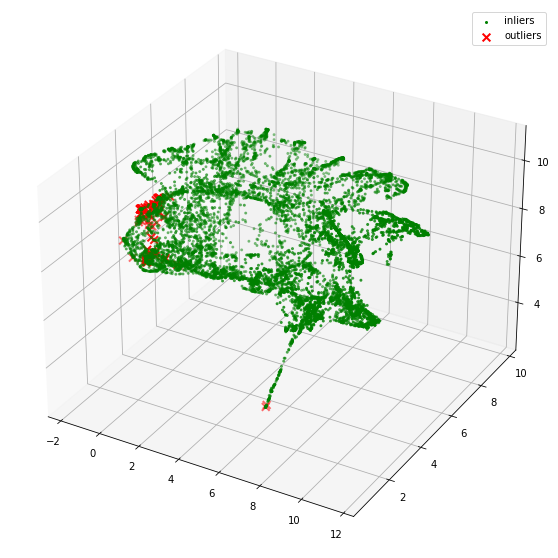

In [125]:
print(isof_y_10)
#outlier_index=[isof_y_10==-1]
df_final["anomaly_10"]=isof_y_10
outlier_index_10=list(df_final.loc[df_final["anomaly_10"]==-1].index)

# Plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection="3d")# Plot the compressed data points
ax.scatter(
    X_reduce[:, 0],
    X_reduce[:, 1],
    zs=X_reduce[:, 2],
    s=4,
    lw=1,
    label="inliers",
    c="green",
)# Plot x's for the ground truth outliers
ax.scatter(
    X_reduce[outlier_index_10, 0],
    X_reduce[outlier_index_10, 1],
    X_reduce[outlier_index_10, 2],
    lw=2,
    s=60,
    marker="x",
    c="red",
    label="outliers",
)
ax.legend()
plt.show()

In [133]:
reducer_final = umap.UMAP(n_components=2,
     n_neighbors=10,verbose=1)
X_umap_final = reducer_final.fit_transform(df_final.drop(columns=["anomaly_10"]))

UMAP(n_neighbors=10, verbose=1)
Construct fuzzy simplicial set
Fri Oct  9 10:49:21 2020 Finding Nearest Neighbors
Fri Oct  9 10:49:21 2020 Building RP forest with 10 trees
Fri Oct  9 10:49:21 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
Fri Oct  9 10:49:22 2020 Finished Nearest Neighbor Search
Fri Oct  9 10:49:22 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Oct  9 10:49:28 2020 Finished embedding


In [142]:
X_umap_final_sc = reducer_final.fit_transform(df_result_sc.drop(columns=["customer_id"]))

UMAP(n_neighbors=10, verbose=1)
Construct fuzzy simplicial set
Fri Oct  9 11:22:27 2020 Finding Nearest Neighbors
Fri Oct  9 11:22:27 2020 Building RP forest with 10 trees
Fri Oct  9 11:22:28 2020 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
Fri Oct  9 11:22:28 2020 Finished Nearest Neighbor Search
Fri Oct  9 11:22:28 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Fri Oct  9 11:22:34 2020 Finished embedding


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_errors = []
silhouette_s = []

for n_clusters in range(2, 20):
    kmeans_pipeline = Pipeline(steps=[('sc', sc),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=17, verbose=0))])
    kmeans_pipeline.fit(df_min)
    kmeans_pipeline.predict(df_min)
    cluster_labels = kmeans_pipeline.fit_predict(df_min)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_min, cluster_labels))
    silhouette_s.append(silhouette_score(df_min, cluster_labels))

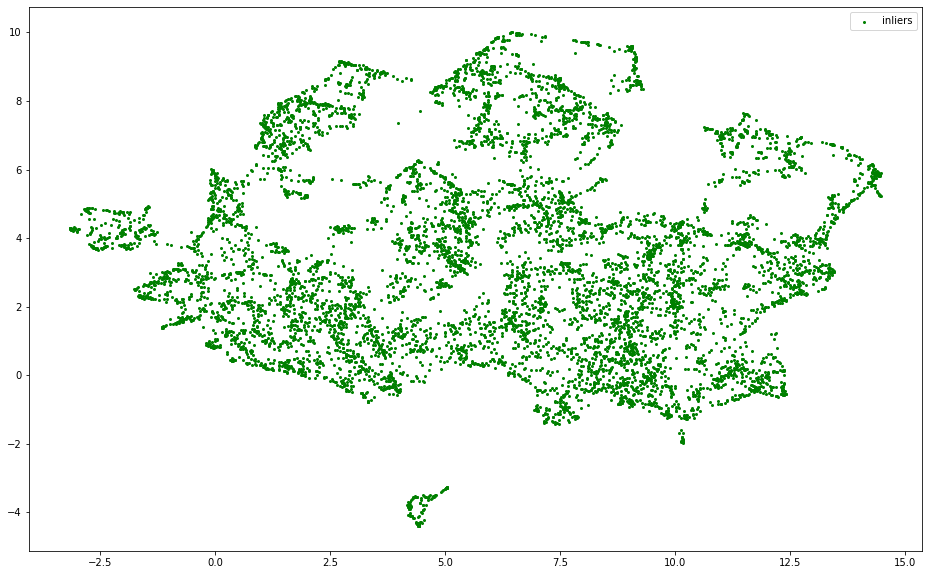

In [144]:
# Plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)# Plot the compressed data points
ax.scatter(
    X_umap_final_sc[:, 0],
    X_umap_final_sc[:, 1],
    s=4,
    lw=1,
    label="inliers",
    c="green",
)# Plot x's for the ground truth outliers
ax.legend()
plt.show()

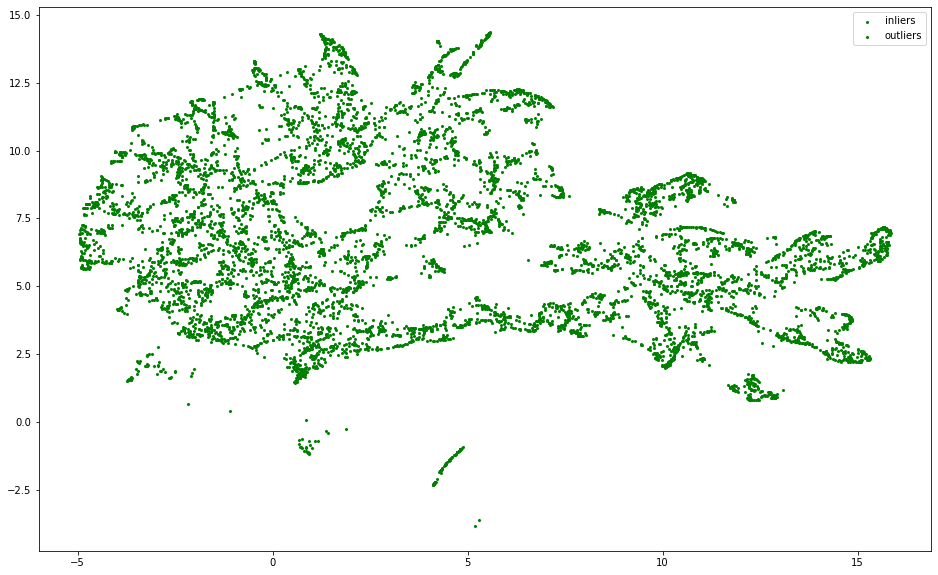

In [145]:
# Plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)# Plot the compressed data points
ax.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    s=4,
    lw=1,
    label="inliers",
    c="green",
)# Plot x's for the ground truth outliers
ax.scatter(
    X_umap_final[outlier_index_10, 0],
    X_umap_final[outlier_index_10, 1],
    lw=2,
    s=4,
    marker="x",
    c="green",
    label="outliers",
)
ax.legend()
plt.show()

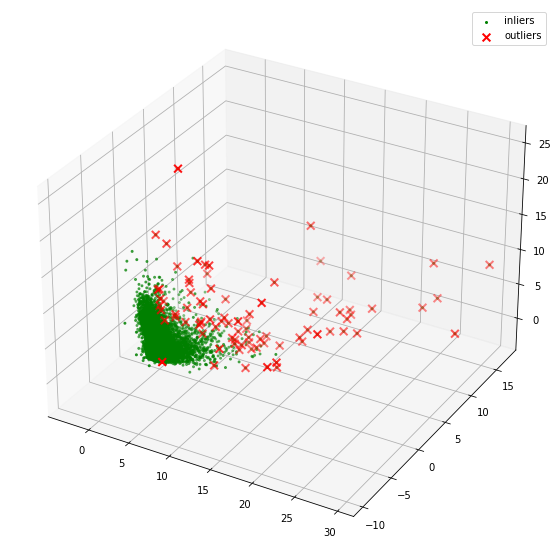

In [128]:
# Plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection="3d")# Plot the compressed data points
ax.scatter(
    X_reduce_PCA[:, 0],
    X_reduce_PCA[:, 2],
    zs=X_reduce_PCA[:, 1],
    s=4,
    lw=1,
    label="inliers",
    c="green",
)# Plot x's for the ground truth outliers
ax.scatter(
    X_reduce_PCA[outlier_index_10, 0],
    X_reduce_PCA[outlier_index_10, 2],
    X_reduce_PCA[outlier_index_10, 1],
    lw=2,
    s=60,
    marker="x",
    c="red",
    label="outliers",
)
ax.legend()
plt.show()

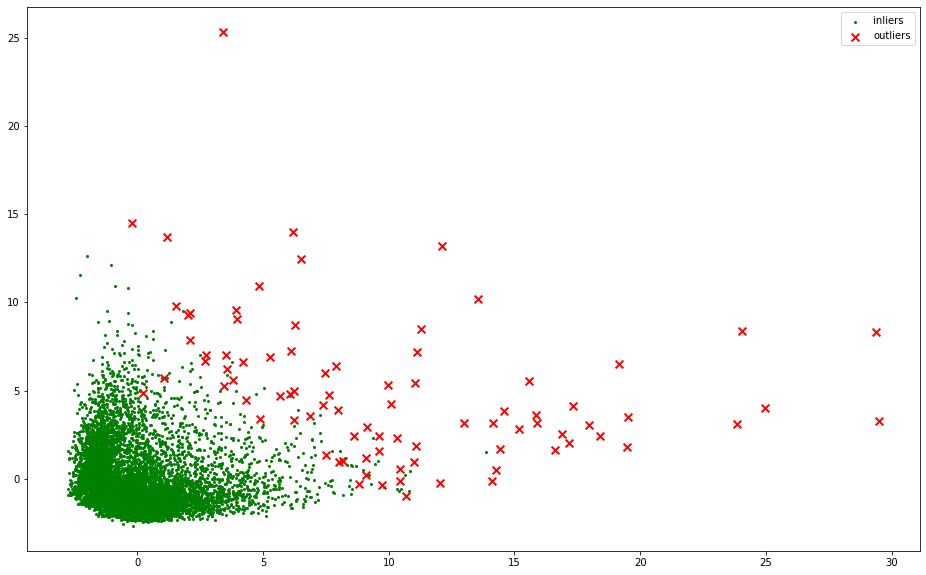

In [130]:
# Plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)# Plot the compressed data points
ax.scatter(
    X_reduce_PCA[:, 0],
    X_reduce_PCA[:, 1],
    s=4,
    lw=1,
    label="inliers",
    c="green",
)# Plot x's for the ground truth outliers
ax.scatter(
    X_reduce_PCA[outlier_index_10, 0],
    X_reduce_PCA[outlier_index_10, 1],
    lw=2,
    s=60,
    marker="x",
    c="red",
    label="outliers",
)
ax.legend()
plt.show()

In [231]:
df=pd.read_csv("data/card_transactions.csv")
df=df.drop(columns=["customer_id"])
df.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.909091         107.6             0.909091   
1                  1.000000         150.3             1.000000   
2                  1.000000           0.0             0.000000   
3                  1.000000           0.0             1.000000   
4                  0.363636           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                  1.000000                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                0.000000                 0            10        1000.0   
1                0.000000                 0             6        1000.0   
2                0.272727                 6             0        1500.0   
3                0.000000                 0            13        2000.0   
4                0.166667                 3             1        2500.0   

   fixed_rate_period     payments  min_payments  full_payment_prc  
0                 11    89.868853     89.711672          0.428571  
1                  6    54.722514     82.955180          0.000000  
2                 11   303.031979    443.781316          0.000000  
3                 12   704.240770    795.859808          0.000000  
4                 12  4094.261427     40.142262          0.000000

In [193]:
cluster_errors = []
silhouette_s = []

num_col_name = df.iloc[:, list(np.where(df.dtypes != "object")[0])].columns

### Recreate Dataframe
pip_sc_knn=Pipeline(steps=[('sc', sc), ('knn', imputer )])
X_imputed = pip_sc_knn.fit_transform(df)
df_imputed = pd.DataFrame(X_imputed,columns=df.columns)
print(df_imputed.isna().sum())

for n_clusters in range(2, 20):
    kmeans_pipeline = Pipeline(steps=[('sc', sc), ('knn_imput', KNNImputer(n_neighbors=5, weights="distance") ),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=17, verbose=0))])
    kmeans_pipeline.fit(df)
    kmeans_pipeline.predict(df)
    cluster_labels = kmeans_pipeline.fit_predict(df)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(df_imputed, cluster_labels))
    silhouette_s.append(silhouette_score(df_imputed, cluster_labels))

balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64
For n_clusters = 2 The average silhouette_score is : 0.2089779341209885
For n_clusters = 3 The average silhouette_score is : 0.25133779818030433
For n_clusters = 4 The average silhouette_score is : 0.20064346581328288
For n_clusters = 5 The average silhouette_score is : 0.19264110290560055
For n_clusters = 6 The average silhouette_score is

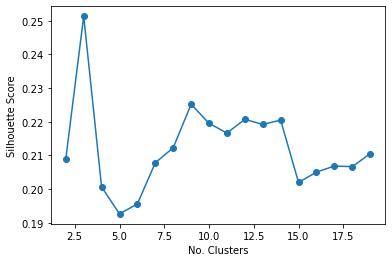

In [194]:
plt.plot(range(2, 20),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

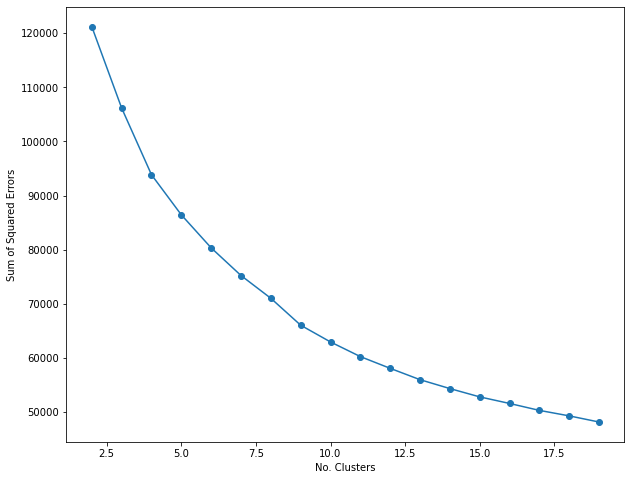

In [209]:
fig = plt.figure(figsize=(10,8))

plt.plot(range(2, 20),cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Sum of Squared Errors")
xticks(np.arange(3, 19, step=2))
plt.savefig("cluster_error_elbow.png")
plt.show()
#plt.savefig("cluster_error_elbow.pdf")

In [234]:
kmeans_pipeline = Pipeline(steps=[('sc', sc), ('knn_imput', KNNImputer(n_neighbors=5, weights="distance") ),
        ("cluster", KMeans(n_clusters=5, random_state=17, verbose=0))])
cluster_labels_N5 = kmeans_pipeline.fit_predict(df)

kmeans_pipeline = Pipeline(steps=[('sc', sc), ('knn_imput', KNNImputer(n_neighbors=5, weights="distance") ),
        ("cluster", KMeans(n_clusters=6, random_state=17, verbose=0))])
cluster_labels_N6 = kmeans_pipeline.fit_predict(df)

kmeans_pipeline = Pipeline(steps=[('sc', sc), ('knn_imput', KNNImputer(n_neighbors=5, weights="distance") ),
        ("cluster", KMeans(n_clusters=4, random_state=17, verbose=0))])
cluster_labels_N4 = kmeans_pipeline.fit_predict(df)

kmeans_pipeline = Pipeline(steps=[('sc', sc), ('knn_imput', KNNImputer(n_neighbors=5, weights="distance") ),
        ("cluster", KMeans(n_clusters=3, random_state=17, verbose=0))])
cluster_labels_N3 = kmeans_pipeline.fit_predict(df)

kmeans_pipeline = Pipeline(steps=[('sc', sc), ('knn_imput', KNNImputer(n_neighbors=5, weights="distance") ),
        ("cluster", KMeans(n_clusters=8, random_state=17, verbose=0))])
cluster_labels_N8 = kmeans_pipeline.fit_predict(df)

<Figure size 1440x7200 with 0 Axes>

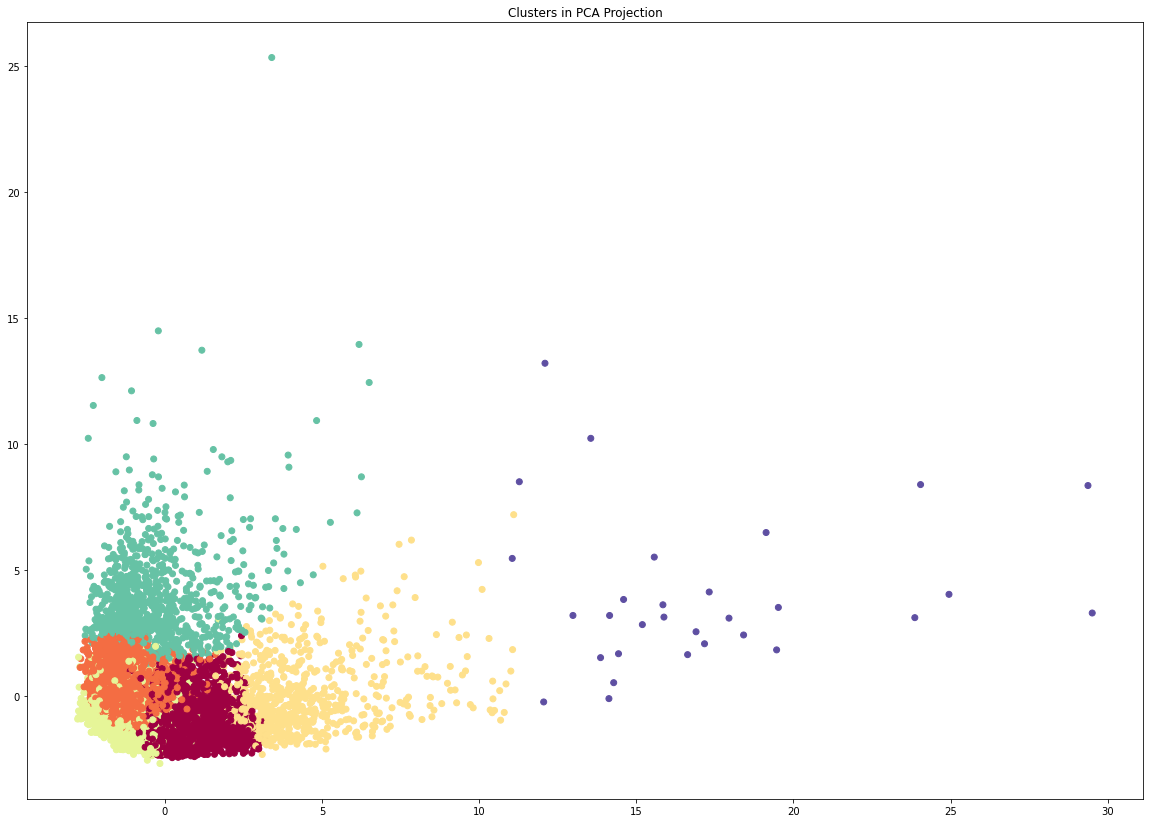

In [235]:
fig = plt.figure(figsize=(20,100))


pca = PCA(n_components=2,random_state=17)


pip_pca=Pipeline(steps=[('sc', sc),('knn_imput', KNNImputer(n_neighbors=6, weights="distance")), ('pca', pca)])


X_pca = pip_pca.fit_transform(df)

fig = plt.figure(figsize=(20,100))
# plot original roll
ax = fig.add_subplot(611)
ax.scatter(X_pca[:, 0], X_pca[:, 1],c=cluster_labels_N6, cmap=plt.cm.Spectral)
ax.set_title("Clusters in PCA Projection")
plt.show()

In [237]:
df["ClusterID3"]=cluster_labels_N3
df["ClusterID4"]=cluster_labels_N4
df["ClusterID5"]=cluster_labels_N5
df["ClusterID6"]=cluster_labels_N6
df["ClusterID8"]=cluster_labels_N8

df.head()
df.to_csv("final_Df_prelim.csv")

In [218]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=label_sankey,
            ),
            link=dict(
                source = list(sankey_df["payments"]),
                target=list(sankey_df["ClusterID3"]),
                value=list(sankey_df["fixed_rate_period"]), # just choose one randonly
            ),
        )
    ]
)

fig.update_layout(title_text="DNA Analysis", font_size=15)
fig.show()

NameError: name 'label_sankey' is not defined

In [238]:
print(len(df[df["ClusterID4"]==0]),len(df[df["ClusterID4"]==1]),len(df[df["ClusterID4"]==2]),len(df[df["ClusterID4"]==3]))
print(len(df[df["ClusterID4"]==0])/len(df["ClusterID4"]),len(df[df["ClusterID4"]==1])/len(df["ClusterID4"]),len(df[df["ClusterID4"]==2])/len(df["ClusterID4"]),len(df[df["ClusterID4"]==3])/len(df["ClusterID4"]))

3232 1178 278 3812
0.38023529411764706 0.13858823529411765 0.032705882352941175 0.4484705882352941


In [239]:
print(len(df[df["ClusterID6"]==0]),len(df[df["ClusterID6"]==1]),len(df[df["ClusterID6"]==2]),len(df[df["ClusterID6"]==3]),len(df[df["ClusterID6"]==4]),len(df[df["ClusterID6"]==5]))
print(len(df[df["ClusterID6"]==0])/len(df["ClusterID6"]),len(df[df["ClusterID6"]==1])/len(df["ClusterID6"]),len(df[df["ClusterID6"]==2])/len(df["ClusterID6"]),len(df[df["ClusterID6"]==3])/len(df["ClusterID6"]),len(df[df["ClusterID6"]==4])/len(df["ClusterID6"]),len(df[df["ClusterID6"]==5])/len(df["ClusterID6"]))

2717 2818 717 1277 941 30
0.3196470588235294 0.3315294117647059 0.08435294117647059 0.15023529411764705 0.11070588235294118 0.0035294117647058825


In [246]:
print(len(df[df["ClusterID5"]==0]),len(df[df["ClusterID5"]==1]),len(df[df["ClusterID5"]==2]),len(df[df["ClusterID5"]==3]),len(df[df["ClusterID5"]==4]))

1106 1318 78 3711 2287


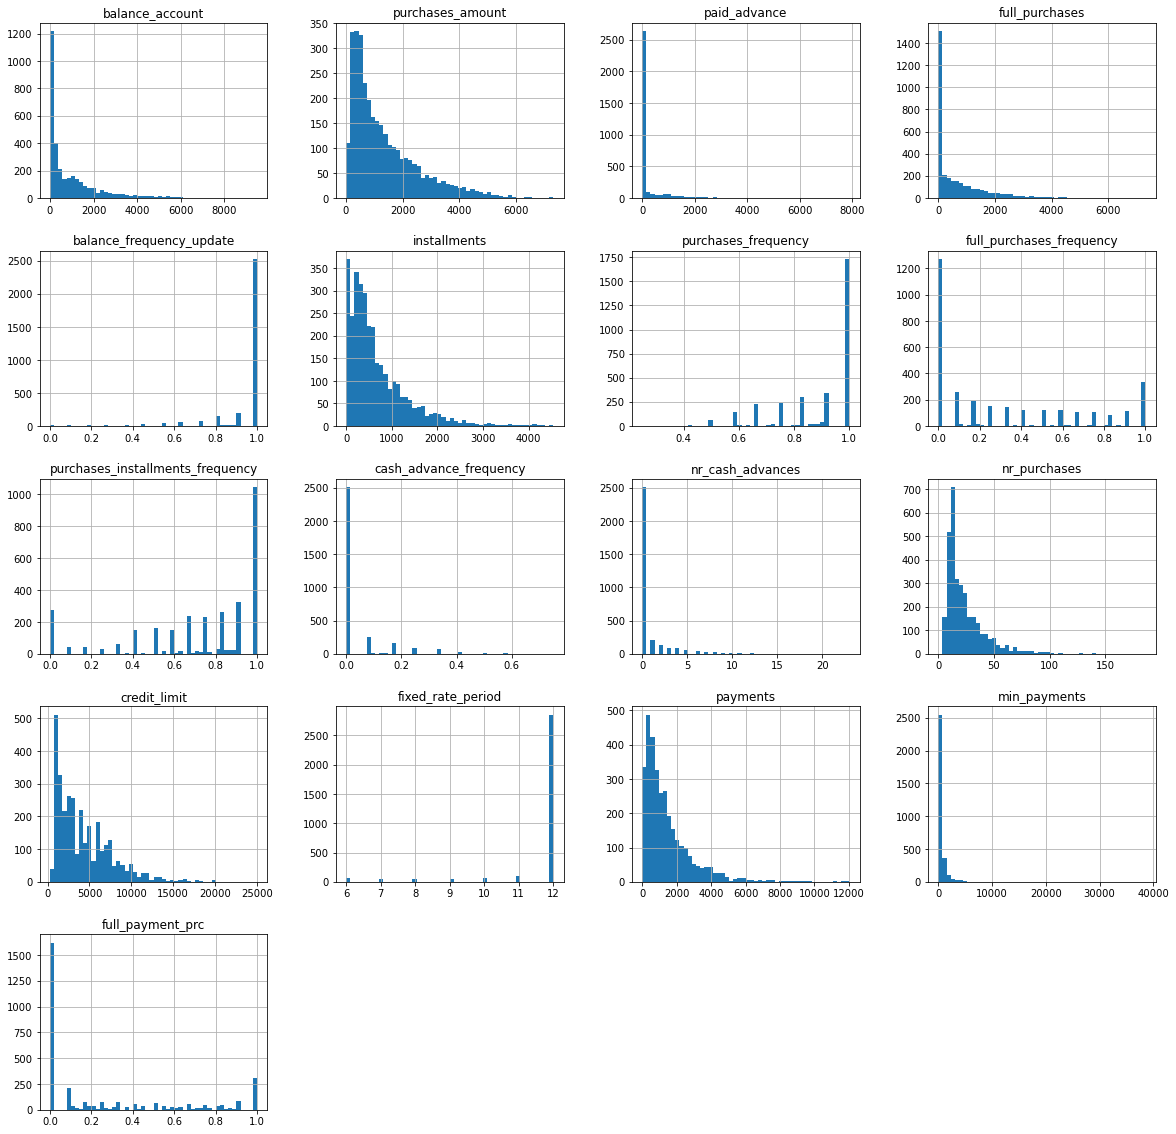

In [343]:
df[df["Segmentation"]=="Gold"].drop(columns=["Segmentation","ClusterID3","ClusterID5","ClusterID6","ClusterID8"]).hist(bins=50, figsize=(20,20))#standard
plt.show()

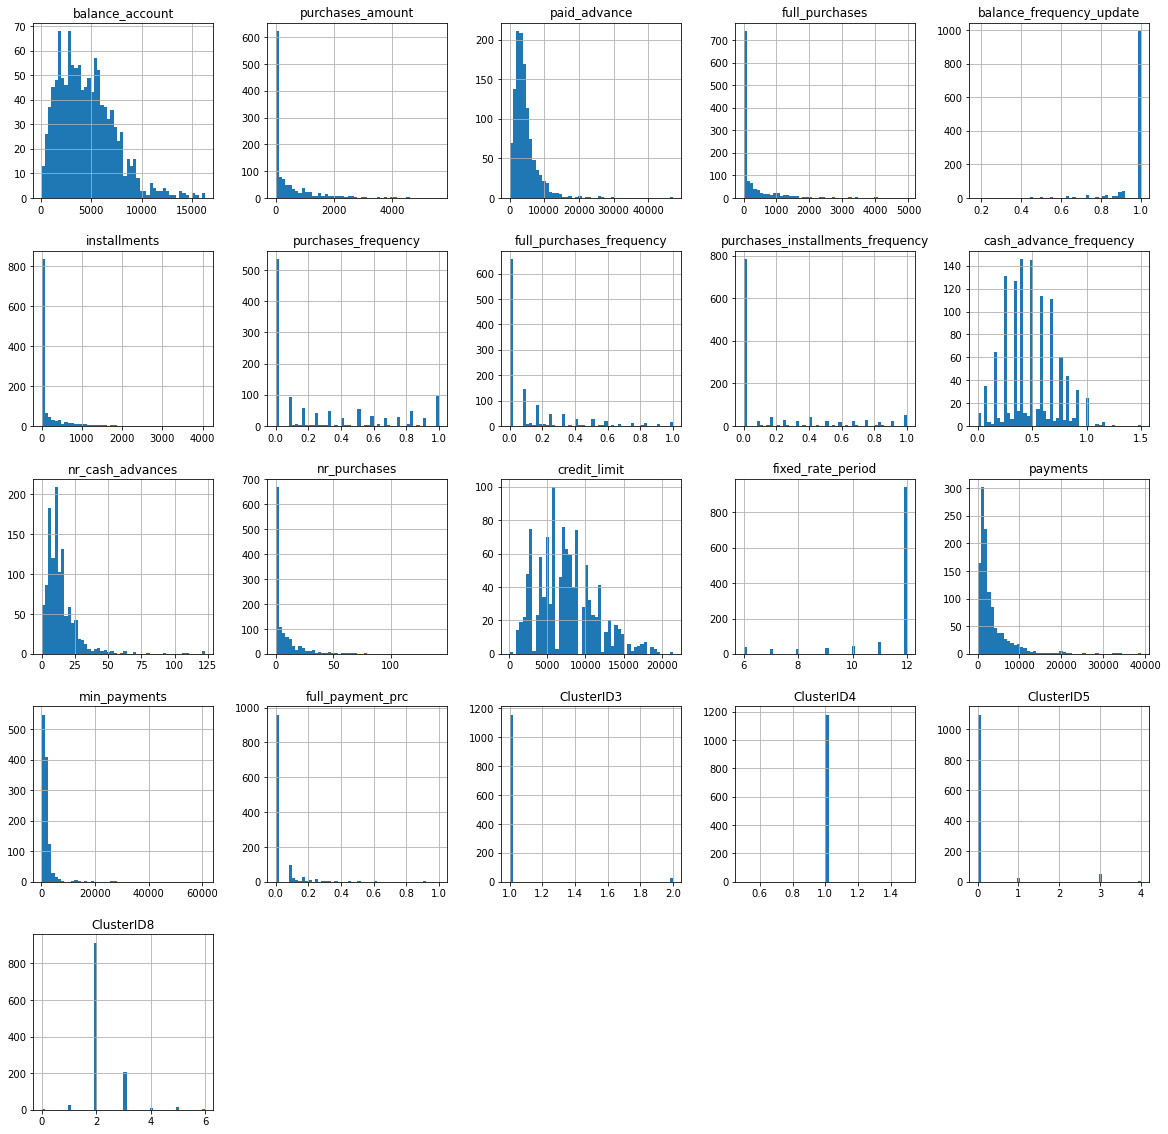

In [226]:
df[df["ClusterID4"]==1].hist(bins=50, figsize=(20,20))#premium
plt.show()

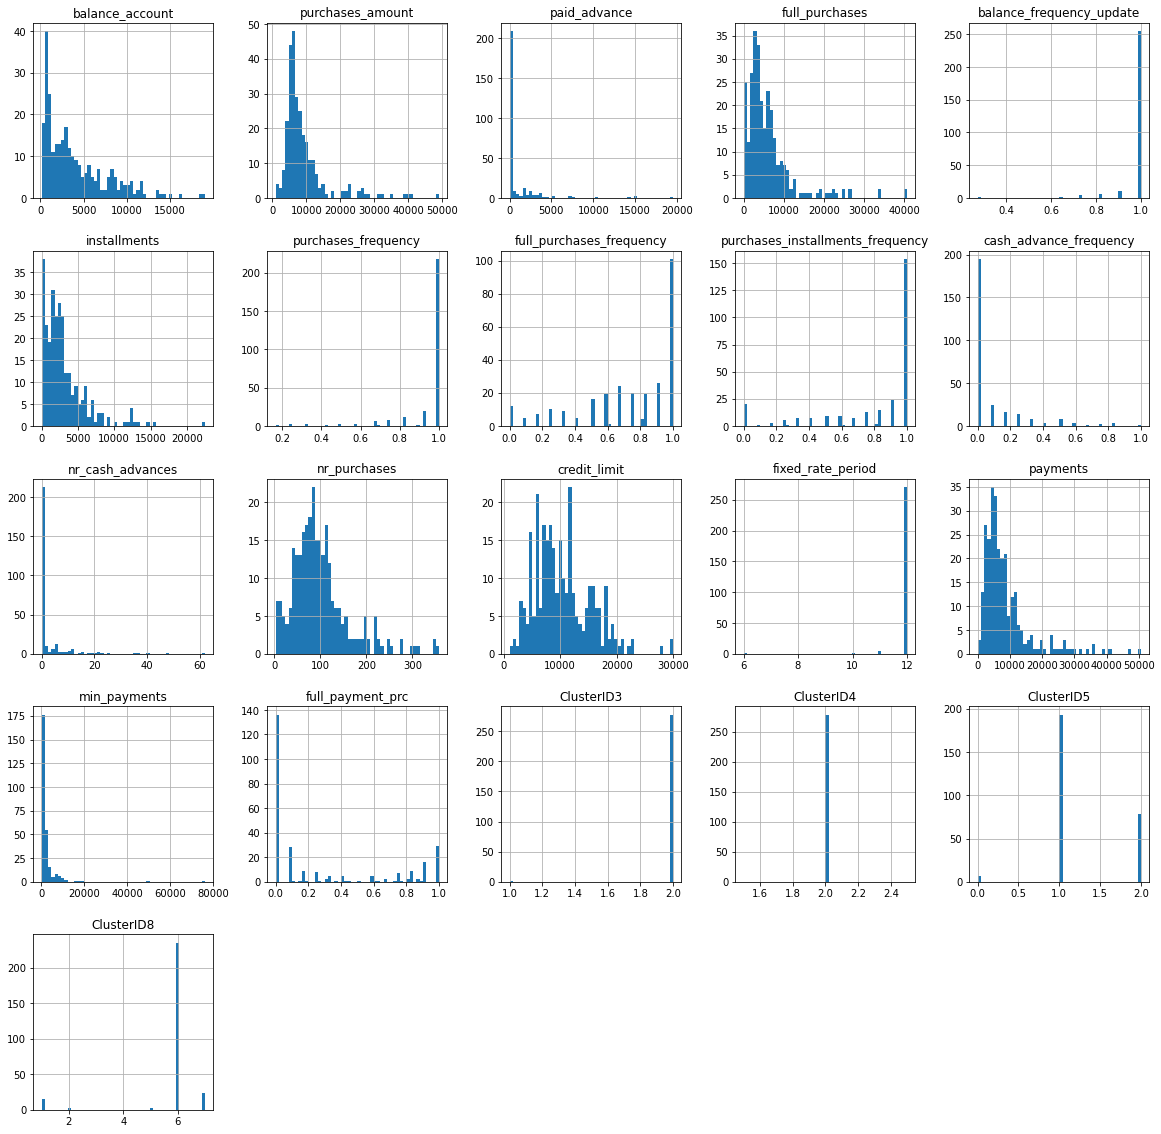

In [227]:
df[df["ClusterID4"]==2].hist(bins=50, figsize=(20,20))#gold
plt.show()

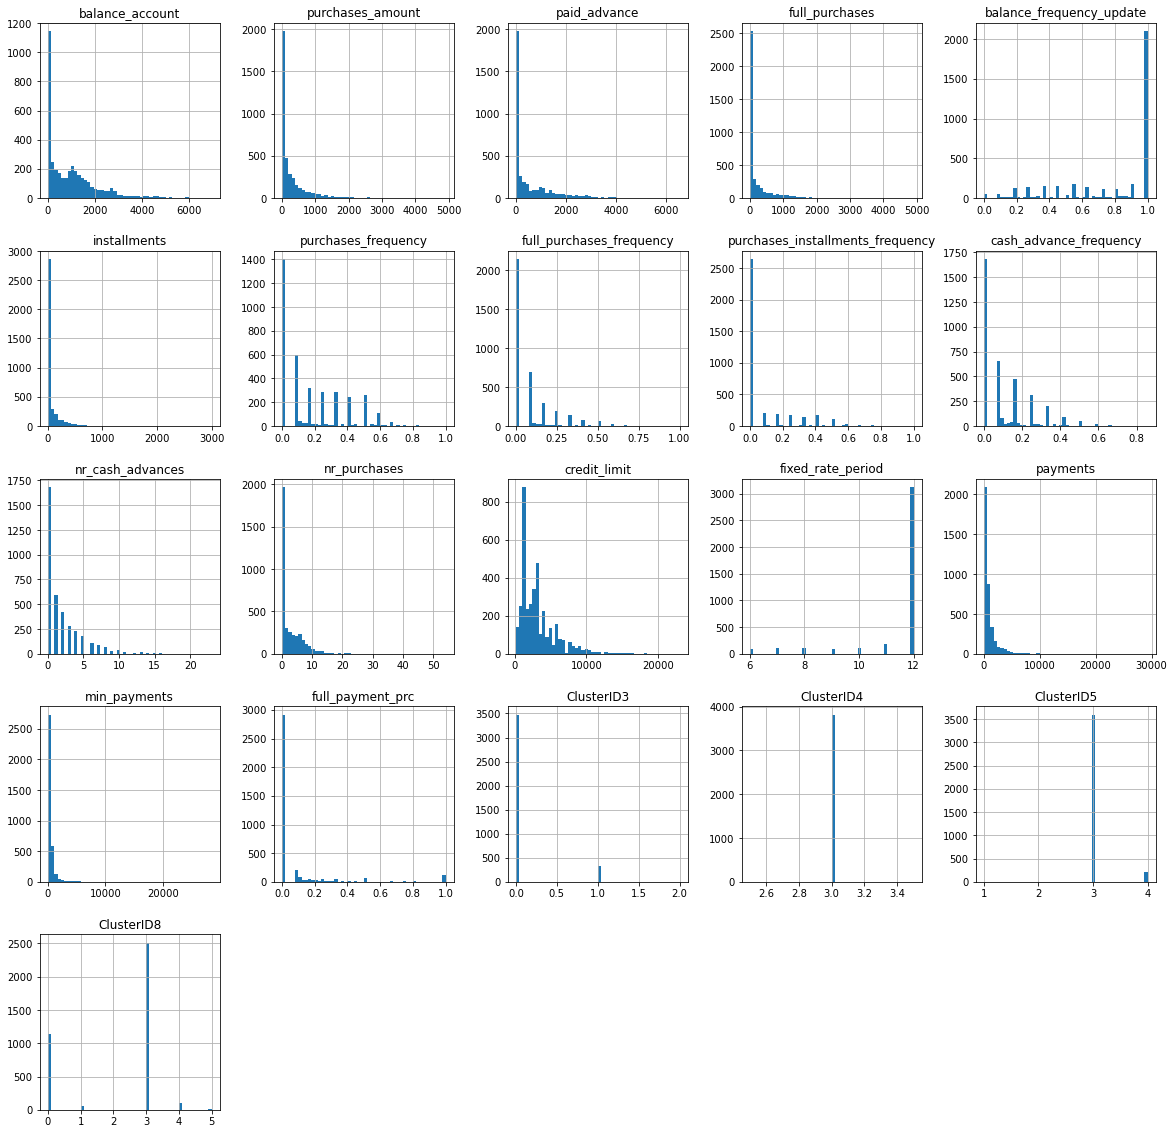

In [228]:
df[df["ClusterID4"]==3].hist(bins=50, figsize=(20,20))#poor
plt.show()

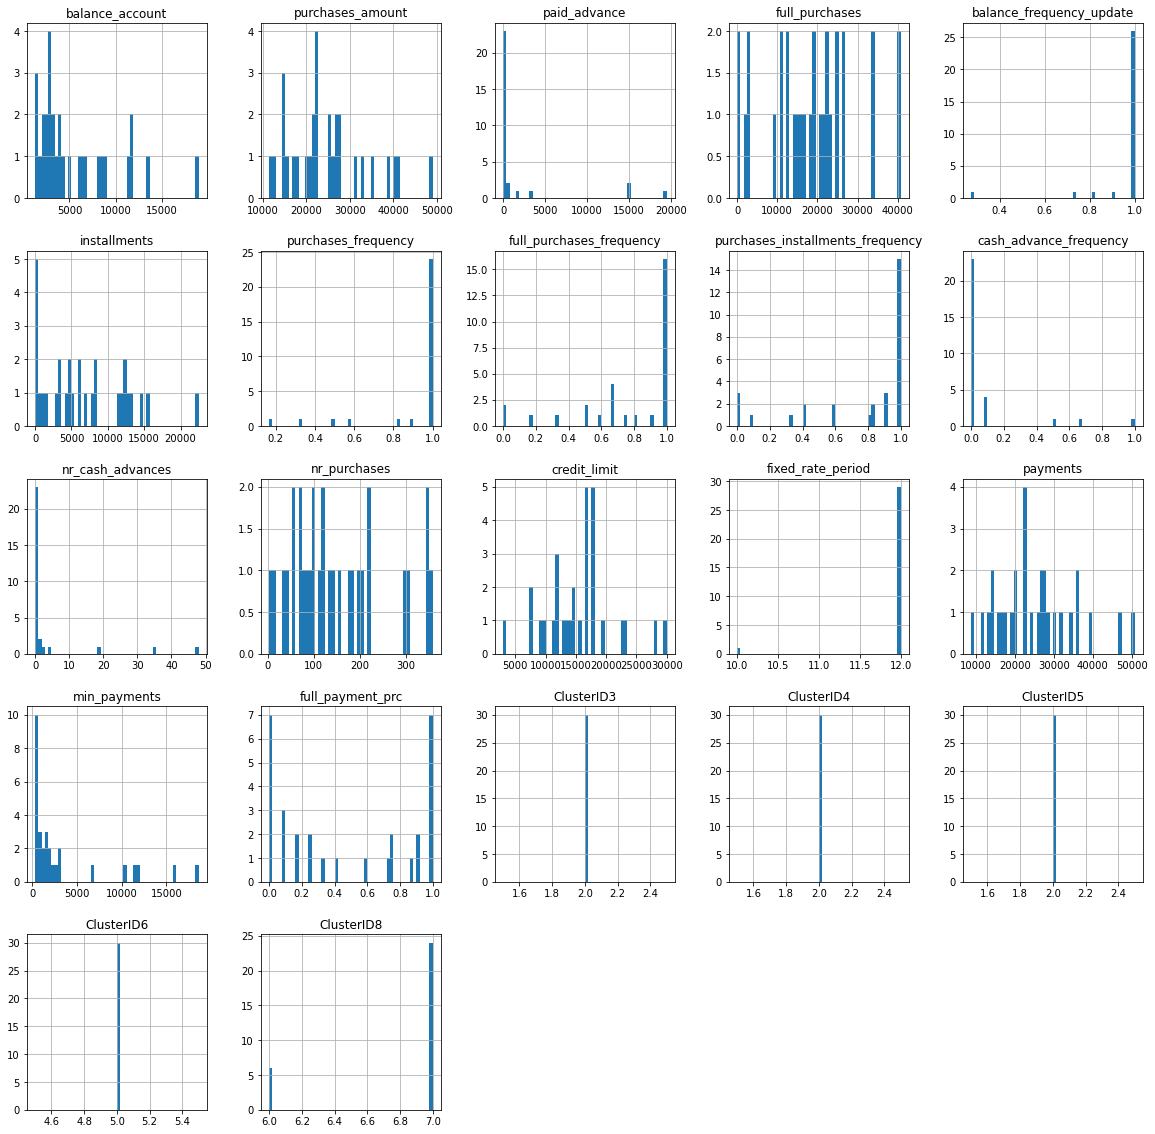

In [240]:
df[df["ClusterID6"]==5].hist(bins=50, figsize=(20,20))#poor
plt.show()

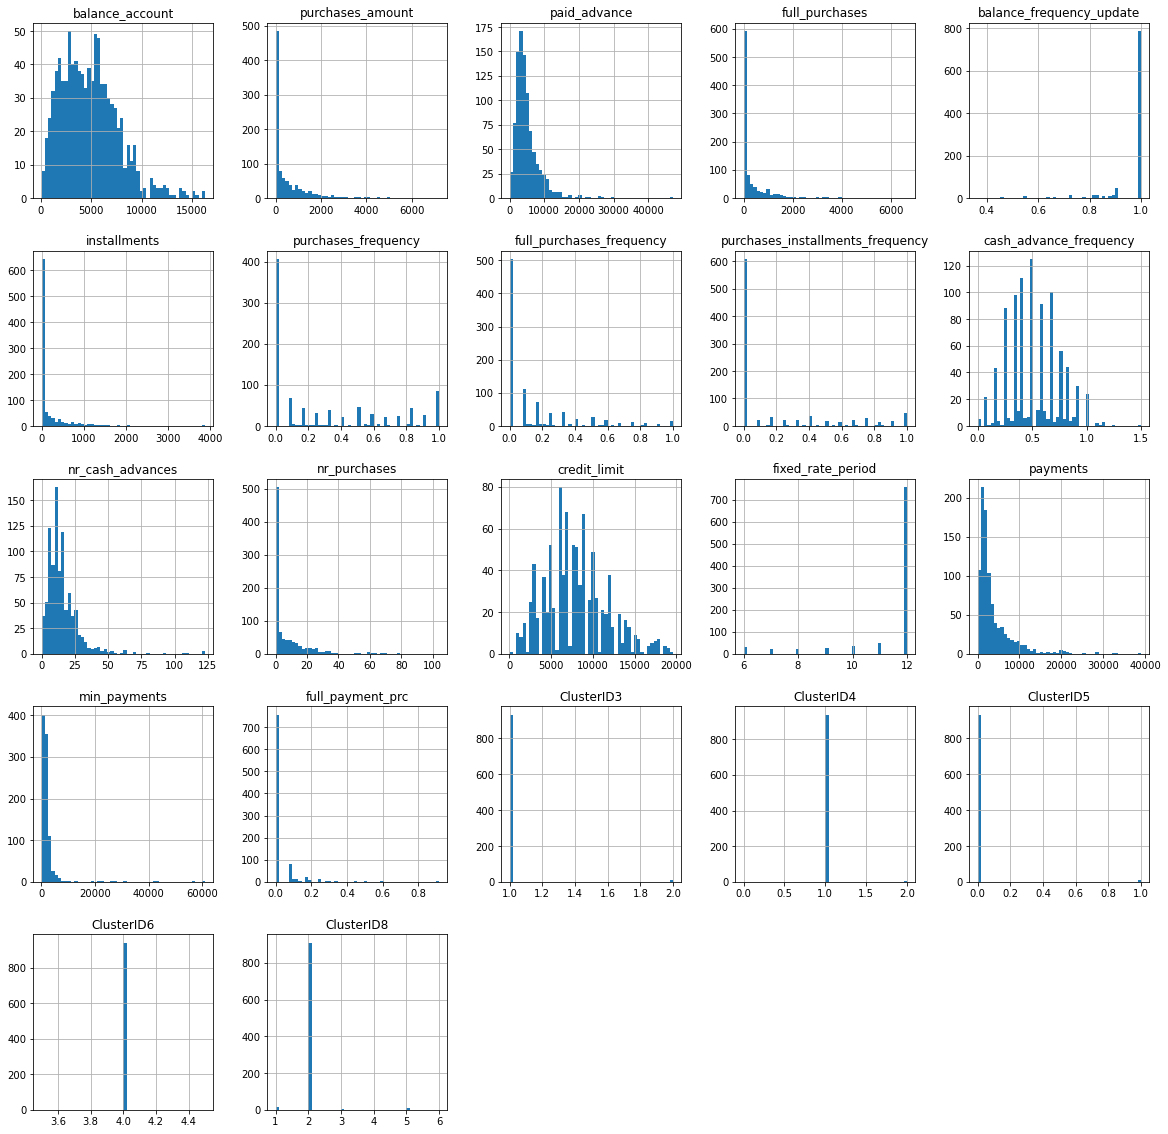

In [241]:
df[df["ClusterID6"]==4].hist(bins=50, figsize=(20,20))#gold
plt.show()

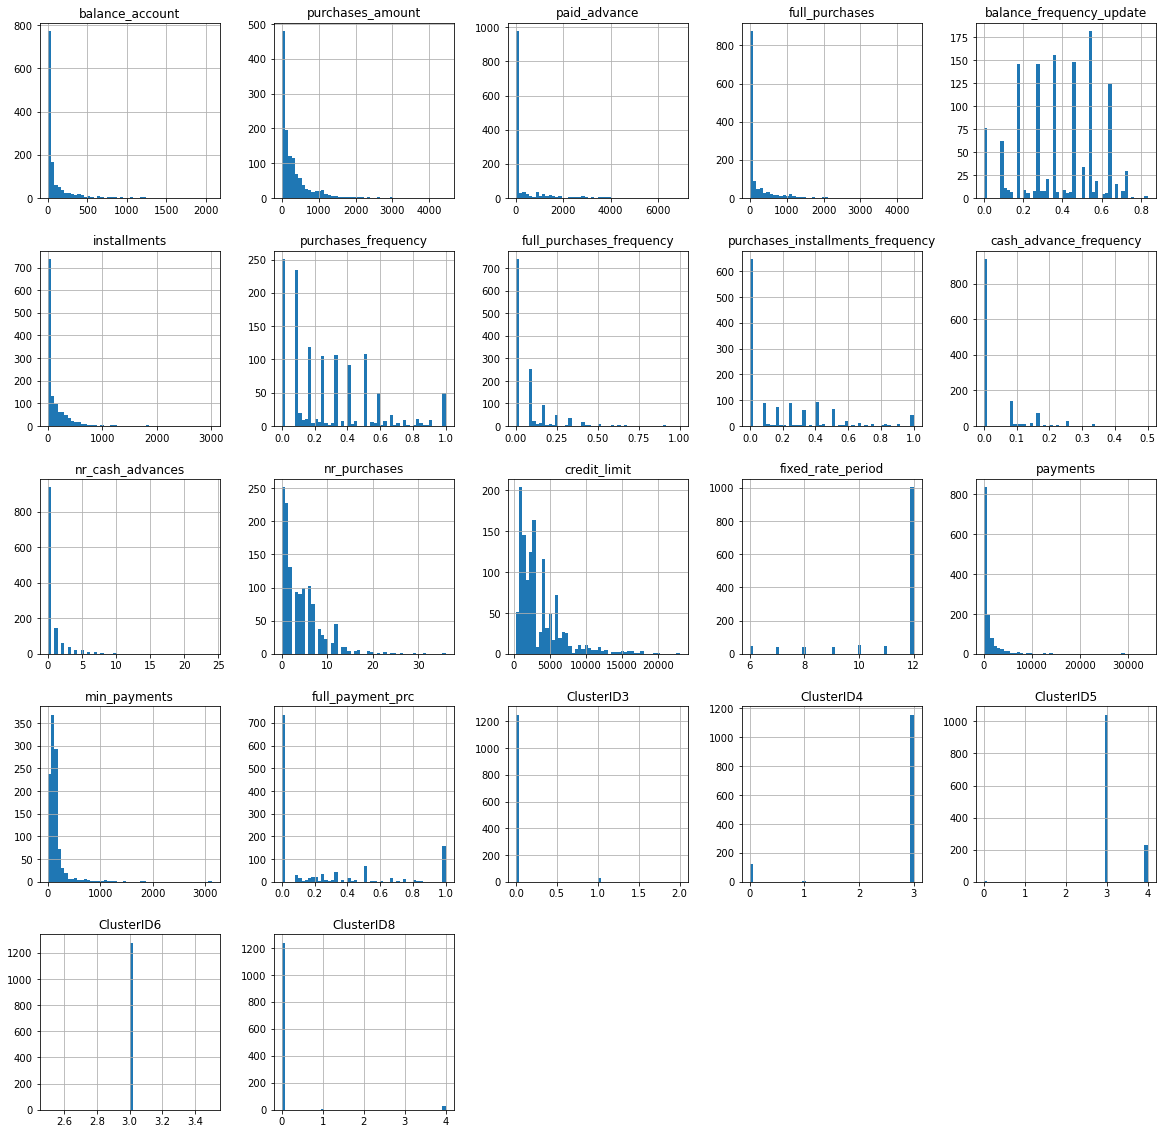

In [242]:
df[df["ClusterID6"]==3].hist(bins=50, figsize=(20,20))#gold
plt.show()

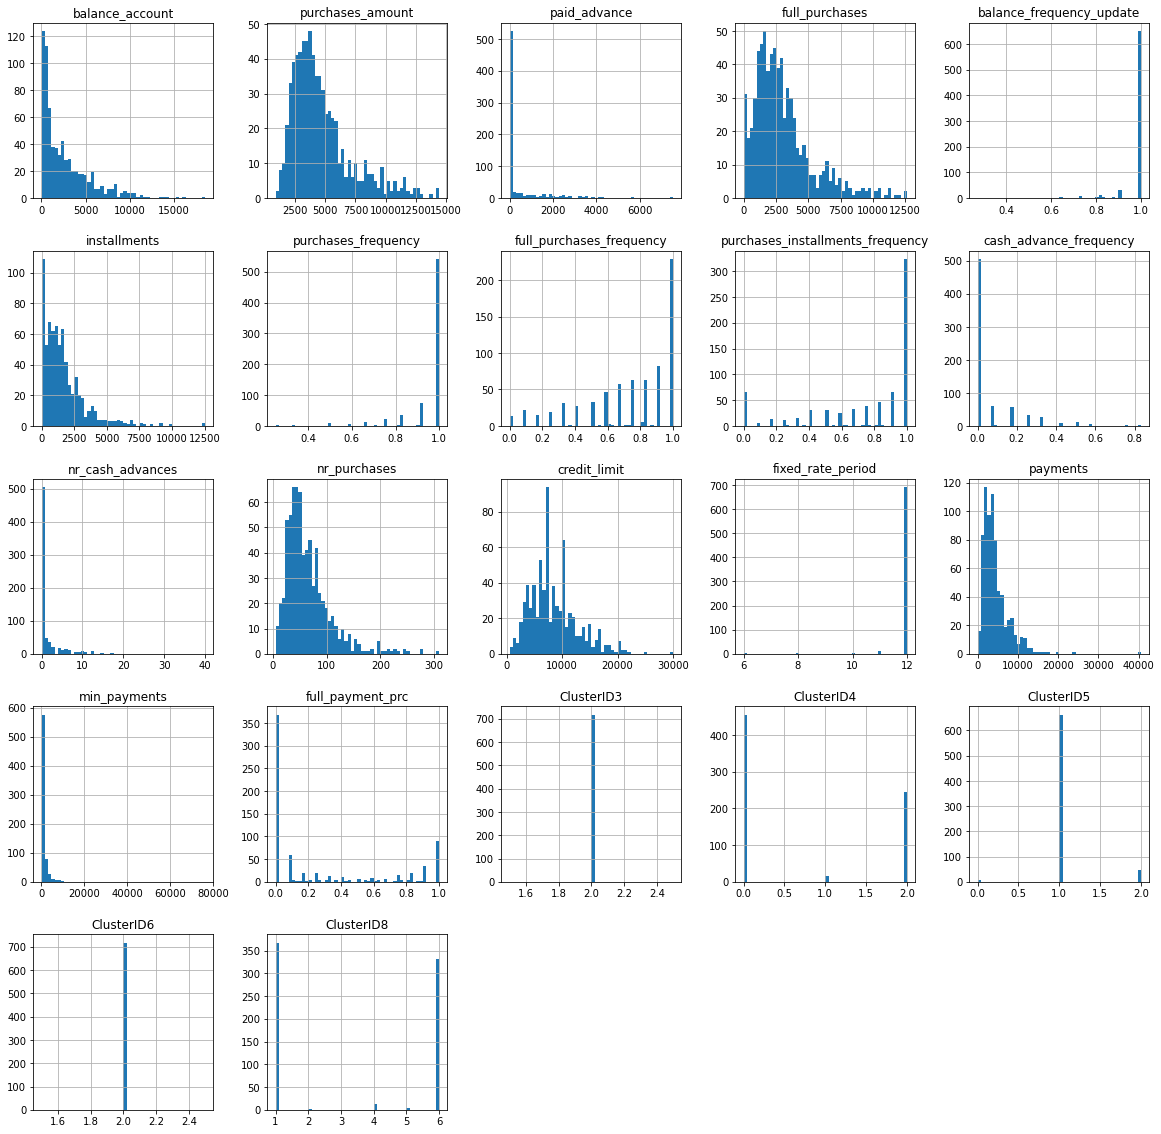

In [243]:
df[df["ClusterID6"]==2].hist(bins=50, figsize=(20,20))#gold
plt.show()

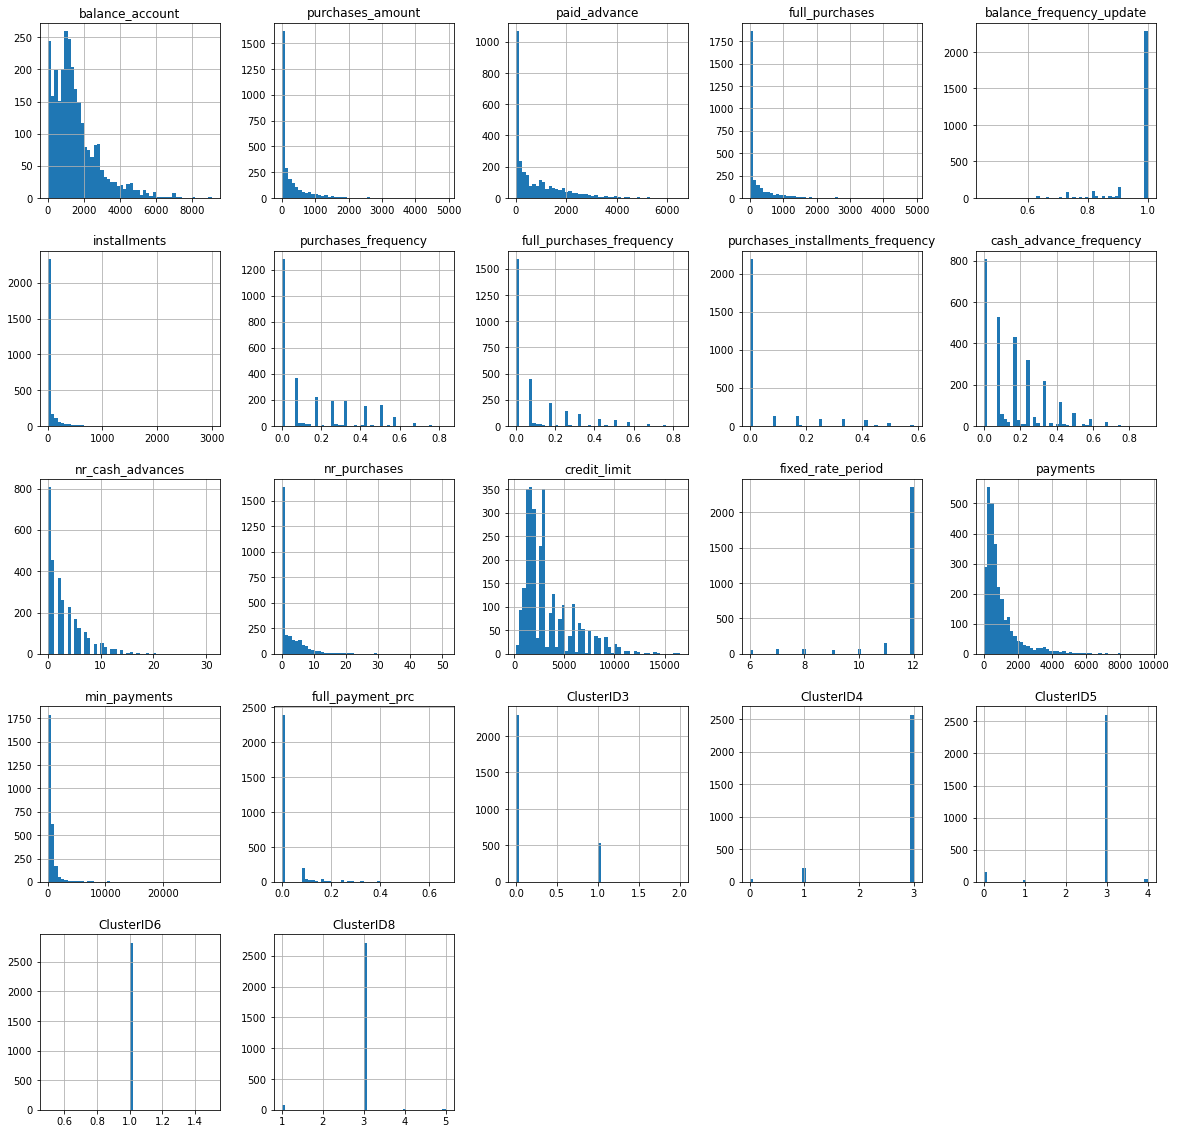

In [244]:
df[df["ClusterID6"]==1].hist(bins=50, figsize=(20,20))#gold
plt.show()

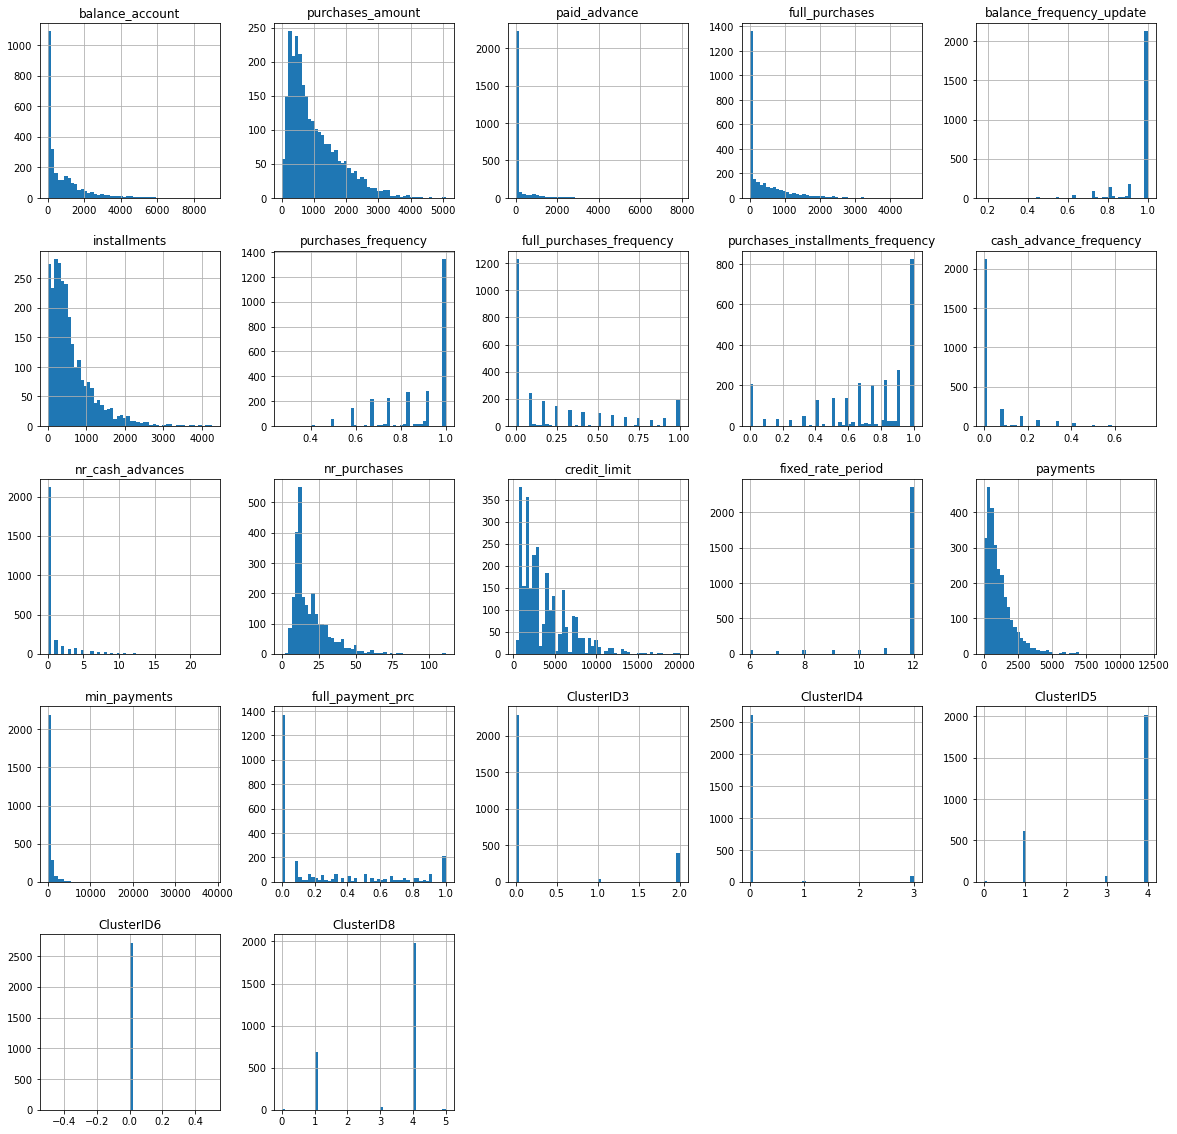

In [245]:
df[df["ClusterID6"]==0].hist(bins=50, figsize=(20,20))#gold
plt.show()

<AxesSubplot:xlabel='purchases_amount', ylabel='nr_purchases'>

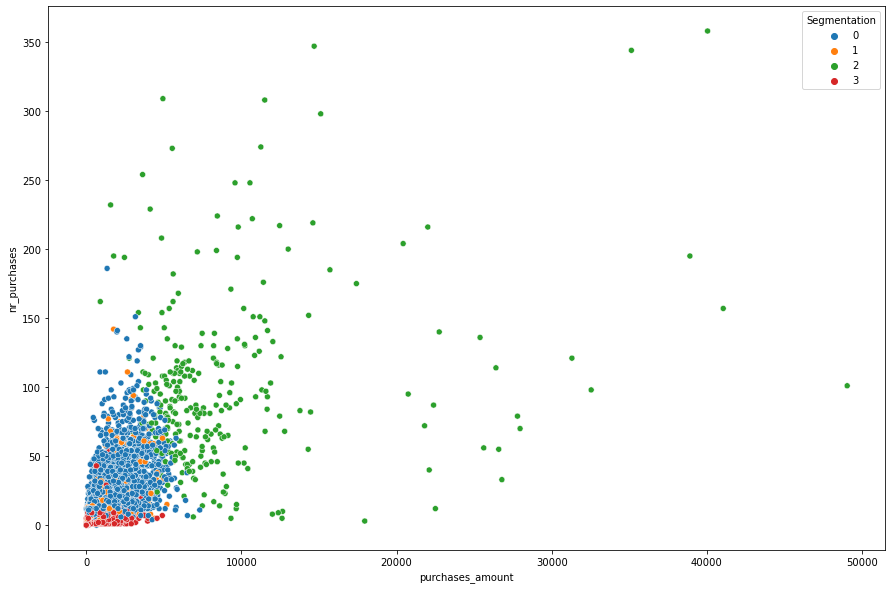

In [284]:
#df.rename(columns={'ClusterID4':'Segmentation'},inplace=True)

fig=plt.figure(figsize=(15,10))
sns.scatterplot(x=df["purchases_amount"],y=df["nr_purchases"],hue=df['Segmentation'],palette=sns.color_palette("tab10", 4))

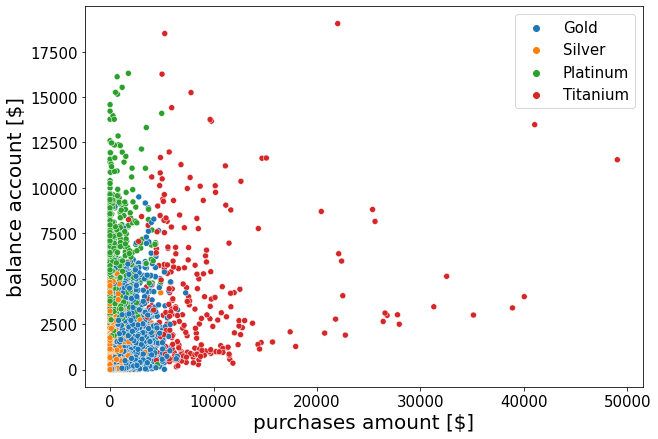

In [322]:
replace_dict= {3: "Silver", 0: "Gold", 2: "Titanium", 1: "Platinum"}
df["Segmentation"]=df["Segmentation"].replace(replace_dict)

f, axs = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(x=df["purchases_amount"],y=df["balance_account"],hue=df['Segmentation'],palette=sns.color_palette("tab10", 4))
#ax.set_xlabel("Market",fontsize=20)
axs.set_xlabel(xlabel="purchases amount [$]",fontsize=20)
axs.legend(fontsize=15)
axs.tick_params(labelsize=15)
#axs.set_xticklabels(axs.get_xticklabels(),fontsize=10)
axs.set_ylabel("balance account [$]",fontsize=20)
f.savefig("balance.png")

<AxesSubplot:xlabel='purchases_amount', ylabel='balance_account'>

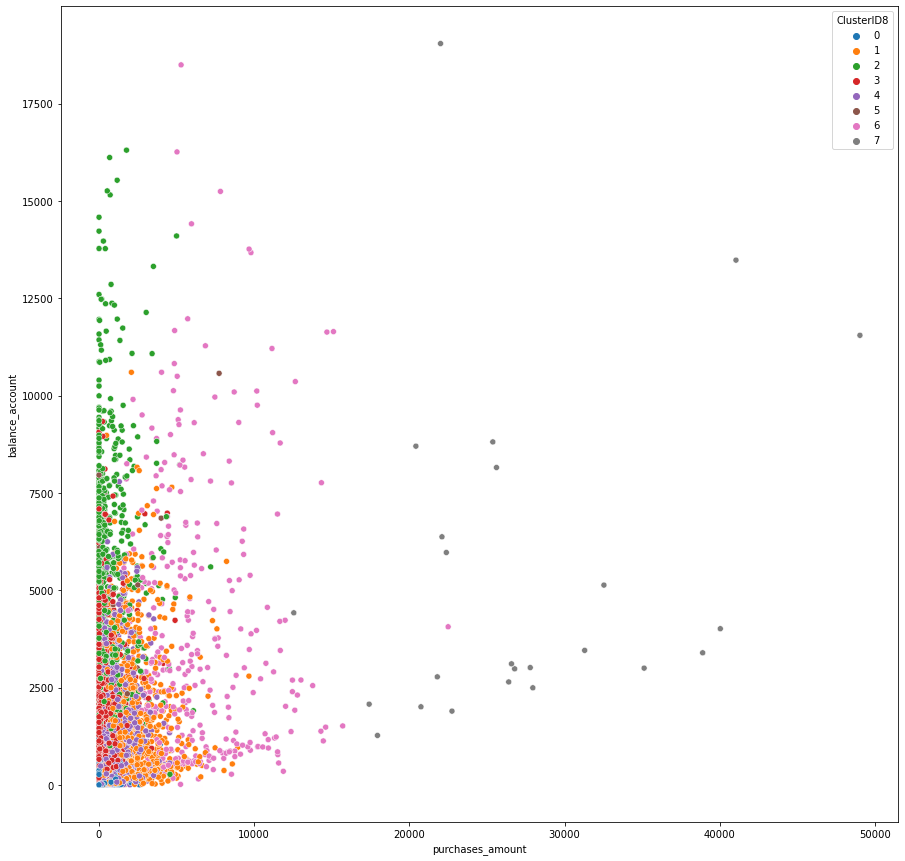

In [310]:
#replace_dict= {3: "Silver", 0: "Gold", 2: "Titanium", 1: "Platinum"}
#df["Segmentation"]=df["Segmentation"].replace(replace_dict)
f, axs = plt.subplots(1,1,figsize=(15,15))

sns.scatterplot(x=df["purchases_amount"],y=df["balance_account"],hue=df['ClusterID8'],palette=sns.color_palette("tab10", 8))

No handles with labels found to put in legend.


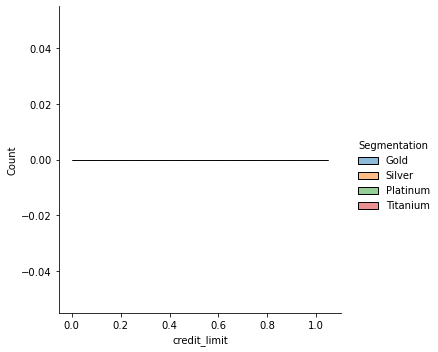

In [367]:
#replace_dict= {3: "Silver", 0: "Gold", 2: "Titanium", 1: "Platinum"}
#df["Segmentation"]=df["Segmentation"].replace(replace_dict)

#f, axs = plt.subplots(1,1,figsize=(10,7))
#fig, axs = plt.subplots(figsize=(10,7))
#fig=plt.figure(figsize=(10,7))
sns.displot(df, x=df["credit_limit"],hue='Segmentation',palette=sns.color_palette("tab10", 4), bins=50,binrange=(0.0, 1.05))
#ax.set_xlabel("Market",fontsize=20)
axs.set_xlabel(xlabel="credit_limit",fontsize=20)
axs.legend(fontsize=15)
axs.tick_params(labelsize=15)
#axs.set_xticklabels(axs.get_xticklabels(),fontsize=10)
axs.set_ylabel("No customers",fontsize=20)
fig.savefig("purchases_amount.png")

No handles with labels found to put in legend.


Text(26.200000000000003, 0.5, 'No customers')

<Figure size 720x504 with 0 Axes>

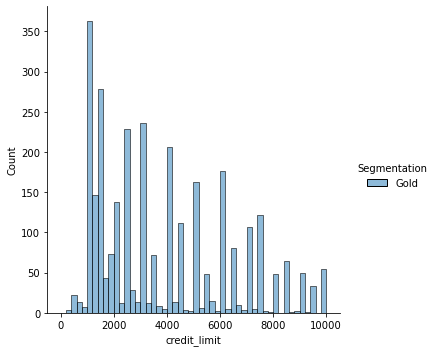

In [365]:
fig=plt.figure(figsize=(10,7))
sns.displot(df[df["Segmentation"]=="Gold"], x=df[df["Segmentation"]=="Gold"]["credit_limit"],hue='Segmentation',palette=sns.color_palette("tab10", 1), bins=50,binrange=(0.0, 10000.0))
#ax.set_xlabel("Market",fontsize=20)
axs.set_xlabel(xlabel="purchases amount [$]",fontsize=20)
axs.legend(fontsize=15)
axs.tick_params(labelsize=15)
#axs.set_xticklabels(axs.get_xticklabels(),fontsize=10)
axs.set_ylabel("No customers",fontsize=20)

AttributeError: 'Rectangle' object has no property 'stacked'

<Figure size 720x504 with 0 Axes>

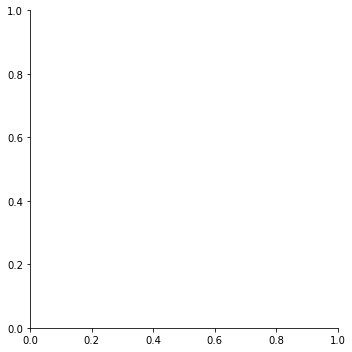

In [364]:
fig=plt.figure(figsize=(10,7))
sns.displot(df[df["Segmentation"]!="Gold"], x=df[df["Segmentation"]=="Gold"]["credit_limit"],stacked=True,hue='Segmentation',palette=sns.color_palette("tab10", 3), bins=50,binrange=(0.0, 10000.0))
#ax.set_xlabel("Market",fontsize=20)
axs.set_xlabel(xlabel="purchases amount [$]",fontsize=20)
axs.legend(fontsize=15)
axs.tick_params(labelsize=15)
#axs.set_xticklabels(axs.get_xticklabels(),fontsize=10)
axs.set_ylabel("No customers",fontsize=20)

No handles with labels found to put in legend.


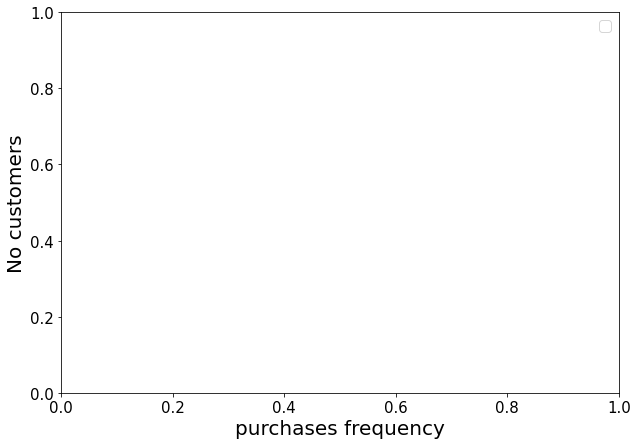

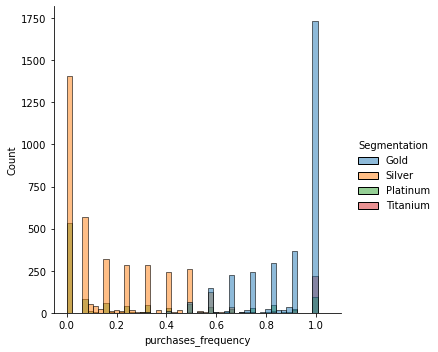

In [368]:
#replace_dict= {3: "Silver", 0: "Gold", 2: "Titanium", 1: "Platinum"}
#df["Segmentation"]=df["Segmentation"].replace(replace_dict)

#f, axs = plt.subplots(1,1,figsize=(10,7))
fig, axs = plt.subplots(figsize=(10,7))
#fig=plt.figure(figsize=(10,7))
sns.displot(df, x=df["purchases_frequency"],hue='Segmentation',palette=sns.color_palette("tab10", 4), bins=50,binrange=(0.0, 1.05))
#ax.set_xlabel("Market",fontsize=20)
axs.set_xlabel(xlabel="purchases frequency",fontsize=20)
axs.legend(fontsize=15)
axs.tick_params(labelsize=15)
#axs.set_xticklabels(axs.get_xticklabels(),fontsize=10)
axs.set_ylabel("No customers",fontsize=20)
fig.savefig("purchases_amount.png")

In [357]:
#replace_dict= {3: "Silver", 0: "Gold", 2: "Titanium", 1: "Platinum"}
#df["Segmentation"]=df["Segmentation"].replace(replace_dict)


df_gold_platinum=df[(df["Segmentation"]=="Platinum") |(df["Segmentation"]=="Titanium")]

No handles with labels found to put in legend.


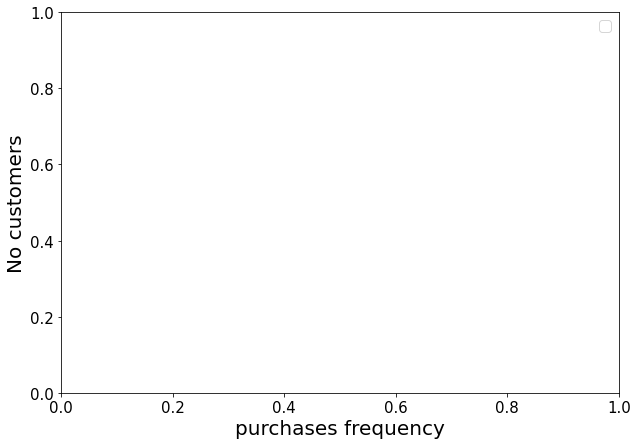

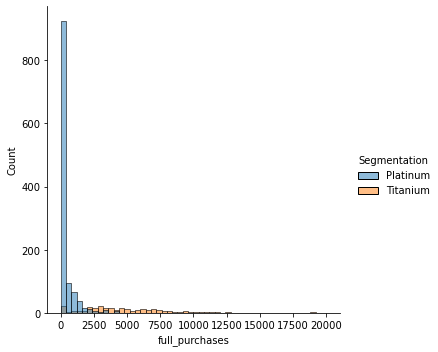

In [362]:
#f, axs = plt.subplots(1,1,figsize=(10,7))
fig, axs = plt.subplots(figsize=(10,7))
#fig=plt.figure(figsize=(10,7))
sns.displot(df_gold_platinum, x=df_gold_platinum["full_purchases"],hue='Segmentation',palette=sns.color_palette("tab10", 2), bins=50,binrange=(0.0, 20000))
#ax.set_xlabel("Market",fontsize=20)
axs.set_xlabel(xlabel="purchases frequency",fontsize=20)
axs.legend(fontsize=15)
axs.tick_params(labelsize=15)
#axs.set_xticklabels(axs.get_xticklabels(),fontsize=10)
axs.set_ylabel("No customers",fontsize=20)
fig.savefig("purchases_amount.png")